# Bài báo cáo 2: Giải thuật Machine Learning 
- Sử dụng giải thuật K-means để phân nhóm các đặc trưng với giá nhà bất động sản.

- Sử dụng thuật toán Descision Tree (ID3) để tiến hành dự đoán giá nhà. 

## Khai báo thư viện:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import plotly.express as px

## Câu 1: Dữ liệu

### Về thu thập:

### - Ở bài báo cáo này, chúng em sử dụng trang https://meeyland.com để cào dữ liệu, thu thập dữ liệu trong lúc cào để có thể tiến hành thực hiện các phân tích cơ bản, khám phá dữ liệu, trực quan hóa và bắt đầu làm những phần ở phía sau. 

### - Lí do mà em và các bạn sử dụng trang này để tiến hành cào thu thập dữ liệu là vì tụi em đã có một số ý tưởng liên quan tới chủ đề bất động sản và sau khi cùng nhau tìm kiếm một số trang uy tín về bất động sản thì tụi em quyết định sử dụng trang meeyland.com - một trang cũng uy tín về bất động sản, có những comment khá tích cực về trang (uy tín) để tiến hành thực hiện bài báo cáo này. 

### Giới thiệu sơ lược về bộ dữ liệu:

area: Diện tích đất ($m^{2}$)

link: Trang bán của sản phẩm

location: Địa điểm, vị trí

name: Tên bài bán

number_of_bathrooms: Số phòng tắm

number_of_bedrooms: Số phòng ngủ

price_per_metter: Giá nhà trên mỗi $m^{2}$ 

### Xem thông tin cơ bản, thống kê mô tả cơ bản của bộ dữ liệu:

. Đọc file và hiển thị file dữ liệu:

In [2]:
df = pd.read_csv('data_bds.csv')
df

area                                               link  \
0      34.0  https://meeyland.com//cuc-pham-cau-giay-vo-chi...   
1      97.0  https://meeyland.com//ban-nha-thanh-dam-long-l...   
2      63.0  https://meeyland.com//ban-nha-2-tang-kiet-o-to...   
3      33.0  https://meeyland.com//ban-nha-ngoc-thuy-long-b...   
4      30.0  https://meeyland.com//gap-ban-nha-hem-745-xe-o...   
...     ...                                                ...   
9995   71.0  https://meeyland.com//tong-quan-nha-nay-gom-4-...   
9996  104.0  https://meeyland.com//vi-tri-dat-o-trung-tam-l...   
9997  231.0  https://meeyland.com//ban-nha-o-dien-tich-gom-...   
9998  296.0  https://meeyland.com//nha-co-4-pn-ban-nha-o-co...   
9999  100.0  https://meeyland.com//co-dien-tich-100m2-ban-n...   

                     location  \
0            Cầu Giấy, Hà Nội   
1           Hoàng Mai, Hà Nội   
2         Liên Chiểu, Đà Nẵng   
3           Long Biên, Hà Nội   
4         Gò Vấp, Hồ Chí Minh   
...                       ...   
9995     Tân Phú, Hồ Chí Minh   
9996      Quận 9, Hồ Chí Minh   
9997  Bình Thạnh, Hồ Chí Minh   
9998      Quận 6, Hồ Chí Minh   
9999    Bình Tân, Hồ Chí Minh   

                                                   name  number_of_bathrooms  \
0     Cực phẩm Cầu Giấy, Võ Chí Công full nội thất 3...                  NaN   
1     Bán nhà Thanh Đàm long lanh ở ngay ô tô dừng đ...                  NaN   
2     Bán nhà 2 tầng kiệt Ô TÔ K382 Tôn Đức Thắng, H...                  3.0   
3                         Bán nhà Ngọc Thụy - Long Biên                  NaN   
4     Gấp bán nhà hẻm 745 xe o to đổ cửa Quang Trung...                  3.0   
...                                                 ...                  ...   
9995  Tổng quan nhà này gồm 4 phòng ngủ bán nhà bán ...                  5.0   
9996  Vị trí đặt ở trung tâm Long Trường, Hồ Chí Min...                  NaN   
9997  Bán nhà ở diện tích gồm 231m2 bán ngay với giá...                  NaN   
9998  Nhà có 4 PN bán nhà ở có diện tích chung là 29...                  4.0   
9999  Có diện tích 100m2 bán nhà nằm tại Bình Trị Đô...                  NaN   

      number_of_bedrooms price_per_metter  
0                    3.0     138,24 Tr/m²  
1                    4.0      126,8 Tr/m²  
2                    3.0      40,48 Tr/m²  
3                    NaN     118,18 Tr/m²  
4                    3.0     133,33 Tr/m²  
...                  ...              ...  
9995                 4.0      91,55 Tr/m²  
9996                 NaN       47,6 Tr/m²  
9997                 NaN      238,1 Tr/m²  
9998                 4.0      55,74 Tr/m²  
9999                 NaN        149 Tr/m²  

[10000 rows x 7 columns]

. Xem số lượng của bộ dữ liệu (dòng, cột):

In [3]:
df.shape

(10000, 7)

Ta thấy rằng bộ dữ liệu gồm 10000 giá trị và 7 cột.

. Xem thông tin về thuộc tính, thông số của bộ dữ liệu:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 10000 non-null  float64
 1   link                 10000 non-null  object 
 2   location             10000 non-null  object 
 3   name                 10000 non-null  object 
 4   number_of_bathrooms  6664 non-null   float64
 5   number_of_bedrooms   8079 non-null   float64
 6   price_per_metter     9405 non-null   object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


Ta có thể thấy rằng bộ dữ liệu còn một số thuộc tính vẫn còn giá trị null khá nhiều.

. Thống kê mô tả cơ bản dữ liệu của thuộc tính định lượng:

In [5]:
df.describe().T

count        mean         std  min   25%   50%   75%  \
area                 10000.0  116.569583  618.698485  4.0  42.0  58.0  85.0   
number_of_bathrooms   6664.0    3.935174    3.853617  1.0   2.0   3.0   4.0   
number_of_bedrooms    8079.0    4.101993    3.688609  1.0   3.0   3.0   4.0   

                         max  
area                 37600.0  
number_of_bathrooms    110.0  
number_of_bedrooms     110.0

. Thống kê mô tả cơ bản dữ liệu của thuộc tính định tính:

In [6]:
df[['link', 'location', 'name', 'price_per_metter']].describe().T

count unique  \
link              10000   9877   
location          10000    165   
name              10000   9855   
price_per_metter   9405   4630   

                                                                top freq  
link              https://meeyland.com//mat-tien-nam-o-binh-an-h...    2  
location                                            Đống Đa, Hà Nội  701  
name                                  Bán nhà Ngọc Thụy - Long Biên    3  
price_per_metter                                          100 Tr/m²  124

### Tiền xử lý (Missing value - Outlier):

. Qua các bước xem thông tin cơ bản về bộ dữ liệu ở trên, ta thấy rằng có một số cần phải xử lý. Vì vậy, trước tiên, ta sẽ xử lý cột price_per_metter trước, để loại bỏ phần chữ phía sau số và dấu ',' trong số của giá trị cột này:

Đầu tiên, loại bỏ chữ 'Tr/m²', 'Ng/m²' hoặc 'Tỷ/m² sau số:

In [7]:
df['price_per_metter'] = df['price_per_metter'].str.replace('Tr/m²', '').str.strip()

In [8]:
df['price_per_metter'] = df['price_per_metter'].str.replace('Tỷ/m²', '').str.strip()

In [9]:
df['price_per_metter'] = df['price_per_metter'].str.replace('Ng/m²', '').str.strip()

Kiểm tra lại xem đã loại bỏ chưa:

In [10]:
df['price_per_metter'].head()

0    138,24
1     126,8
2     40,48
3    118,18
4    133,33
Name: price_per_metter, dtype: object

Tiếp theo, ta sẽ đổi dấu ',' trong số thành dấu '.':

In [11]:
df['price_per_metter'] = df['price_per_metter'].str.replace(',', '.').str.strip()

Kiểm tra lại xem đã đổi dấu thành công hay không:

In [12]:
df['price_per_metter'].head()

0    138.24
1     126.8
2     40.48
3    118.18
4    133.33
Name: price_per_metter, dtype: object

Cuối cùng, ta đổi giá trị ở cột này từ thuộc tính object sang thuộc tính float:

In [13]:
df['price_per_metter'] = pd.to_numeric(df['price_per_metter'], errors='coerce')

Kiểm tra xem đã đổi thành thuộc tính float chưa:

In [14]:
df.dtypes

area                   float64
link                    object
location                object
name                    object
number_of_bathrooms    float64
number_of_bedrooms     float64
price_per_metter       float64
dtype: object

. Ta thấy rằng, bộ dữ liệu khi cào xong vẫn chưa có giá nhà bán. Tuy nhiên, ta vẫn có thể tính được dựa trên việc lấy diện tích 'area' * với giá nhà trên một mét vuông 'price_per_metter':

In [15]:
df['price'] = df['area'] * df['price_per_metter']

In [16]:
df

area                                               link  \
0      34.0  https://meeyland.com//cuc-pham-cau-giay-vo-chi...   
1      97.0  https://meeyland.com//ban-nha-thanh-dam-long-l...   
2      63.0  https://meeyland.com//ban-nha-2-tang-kiet-o-to...   
3      33.0  https://meeyland.com//ban-nha-ngoc-thuy-long-b...   
4      30.0  https://meeyland.com//gap-ban-nha-hem-745-xe-o...   
...     ...                                                ...   
9995   71.0  https://meeyland.com//tong-quan-nha-nay-gom-4-...   
9996  104.0  https://meeyland.com//vi-tri-dat-o-trung-tam-l...   
9997  231.0  https://meeyland.com//ban-nha-o-dien-tich-gom-...   
9998  296.0  https://meeyland.com//nha-co-4-pn-ban-nha-o-co...   
9999  100.0  https://meeyland.com//co-dien-tich-100m2-ban-n...   

                     location  \
0            Cầu Giấy, Hà Nội   
1           Hoàng Mai, Hà Nội   
2         Liên Chiểu, Đà Nẵng   
3           Long Biên, Hà Nội   
4         Gò Vấp, Hồ Chí Minh   
...                       ...   
9995     Tân Phú, Hồ Chí Minh   
9996      Quận 9, Hồ Chí Minh   
9997  Bình Thạnh, Hồ Chí Minh   
9998      Quận 6, Hồ Chí Minh   
9999    Bình Tân, Hồ Chí Minh   

                                                   name  number_of_bathrooms  \
0     Cực phẩm Cầu Giấy, Võ Chí Công full nội thất 3...                  NaN   
1     Bán nhà Thanh Đàm long lanh ở ngay ô tô dừng đ...                  NaN   
2     Bán nhà 2 tầng kiệt Ô TÔ K382 Tôn Đức Thắng, H...                  3.0   
3                         Bán nhà Ngọc Thụy - Long Biên                  NaN   
4     Gấp bán nhà hẻm 745 xe o to đổ cửa Quang Trung...                  3.0   
...                                                 ...                  ...   
9995  Tổng quan nhà này gồm 4 phòng ngủ bán nhà bán ...                  5.0   
9996  Vị trí đặt ở trung tâm Long Trường, Hồ Chí Min...                  NaN   
9997  Bán nhà ở diện tích gồm 231m2 bán ngay với giá...                  NaN   
9998  Nhà có 4 PN bán nhà ở có diện tích chung là 29...                  4.0   
9999  Có diện tích 100m2 bán nhà nằm tại Bình Trị Đô...                  NaN   

      number_of_bedrooms  price_per_metter     price  
0                    3.0            138.24   4700.16  
1                    4.0            126.80  12299.60  
2                    3.0             40.48   2550.24  
3                    NaN            118.18   3899.94  
4                    3.0            133.33   3999.90  
...                  ...               ...       ...  
9995                 4.0             91.55   6500.05  
9996                 NaN             47.60   4950.40  
9997                 NaN            238.10  55001.10  
9998                 4.0             55.74  16499.04  
9999                 NaN            149.00  14900.00  

[10000 rows x 8 columns]

. Tiếp đó, ta sẽ xem bộ dữ liệu này có những giá trị nào thiếu không và tiến hành xử lý giá trị thiếu đấy:

In [17]:
df.isnull().sum()

area                      0
link                      0
location                  0
name                      0
number_of_bathrooms    3336
number_of_bedrooms     1921
price_per_metter        596
price                   596
dtype: int64

Ta thấy rằng, ở 4 cột cuối cùng có các giá trị thiếu là khá nhiều.

- Vẽ biểu đồ nhiệt xem các giá trị bị thiếu:

<Axes: >

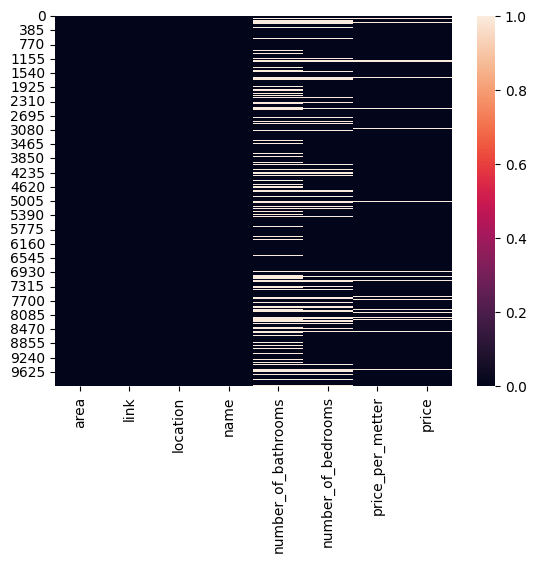

In [18]:
sns.heatmap(df.isnull())

- Kiểm tra xem % các biến bị thiếu dữ liệu:

In [19]:
(df.isnull().sum()/len(df))*100

area                    0.00
link                    0.00
location                0.00
name                    0.00
number_of_bathrooms    33.36
number_of_bedrooms     19.21
price_per_metter        5.96
price                   5.96
dtype: float64

Ta có thể thấy rằng ở 2 cột số phòng tắm, phòng ngủ bị thiếu nhiều dữ liệu hơn so với cột giá nhà trên mét vuông, giá nhà.

Vì vậy, để tiến hành xử lý các giá trị bị thiếu ta sử dụng mô hình dự đoán của học máy KNNimputer để tiến hành dự đoán và xử lý đi giá trị thiếu ở 4 cột cuối cùng trong bộ dữ liệu:

- Chuyển đổi kiểu dữ liệu của cột "number_of_bedrooms" và "number_of_bathrooms" trong DataFrame df từ kiểu dữ liệu hiện tại sang kiểu dữ liệu số (number):

In [20]:
df.number_of_bedrooms = df.number_of_bedrooms.astype(np.number)
df.number_of_bathrooms = df.number_of_bathrooms.astype(np.number)

In [21]:
df.isnull().sum()   

area                      0
link                      0
location                  0
name                      0
number_of_bathrooms    3336
number_of_bedrooms     1921
price_per_metter        596
price                   596
dtype: int64

- Khởi tạo biến lưu trữ các giá trị category:

In [22]:
df_cat = df.select_dtypes(object)
df_cat.head()

link             location  \
0  https://meeyland.com//cuc-pham-cau-giay-vo-chi...     Cầu Giấy, Hà Nội   
1  https://meeyland.com//ban-nha-thanh-dam-long-l...    Hoàng Mai, Hà Nội   
2  https://meeyland.com//ban-nha-2-tang-kiet-o-to...  Liên Chiểu, Đà Nẵng   
3  https://meeyland.com//ban-nha-ngoc-thuy-long-b...    Long Biên, Hà Nội   
4  https://meeyland.com//gap-ban-nha-hem-745-xe-o...  Gò Vấp, Hồ Chí Minh   

                                                name  
0  Cực phẩm Cầu Giấy, Võ Chí Công full nội thất 3...  
1  Bán nhà Thanh Đàm long lanh ở ngay ô tô dừng đ...  
2  Bán nhà 2 tầng kiệt Ô TÔ K382 Tôn Đức Thắng, H...  
3                      Bán nhà Ngọc Thụy - Long Biên  
4  Gấp bán nhà hẻm 745 xe o to đổ cửa Quang Trung...

- Khởi tạo biến lưu trữ giá trị số:

In [23]:
df_num = df.select_dtypes(np.number)
df_num.head()

area  number_of_bathrooms  number_of_bedrooms  price_per_metter     price
0  34.0                  NaN                 3.0            138.24   4700.16
1  97.0                  NaN                 4.0            126.80  12299.60
2  63.0                  3.0                 3.0             40.48   2550.24
3  33.0                  NaN                 NaN            118.18   3899.94
4  30.0                  3.0                 3.0            133.33   3999.90

- Sử dụng KNNImputer() để dự đoán và điền giá trị thiếu vào dữ liệu trong việc xử lý giá thị thiếu.

- KNNImputer() là hàm sử dụng mô hình fit() để học từ dữ liệu có sẵn sau đó dùng để dự đoán và điền giá trị cho các ô bị thiếu.

- Ở trên, ta thấy rằng dữ liệu số (df_num) có giá trị thiếu là rất nhiều do đó ta sẽ tiến hành áp dụng mô hình này để xử lý dữ liệu:

In [24]:
imputer = KNNImputer()

imputer.fit(df_num)

df_num_impute = pd.DataFrame(imputer.transform(df_num), columns=df_num.columns)

In [25]:
df = pd.concat([df_cat, df_num_impute], axis=1)

- Sau khi xử lý xong, vẽ biểu đồ nhiệt để kiểm tra lại xem còn giá trị nào thiếu không:

<Axes: >

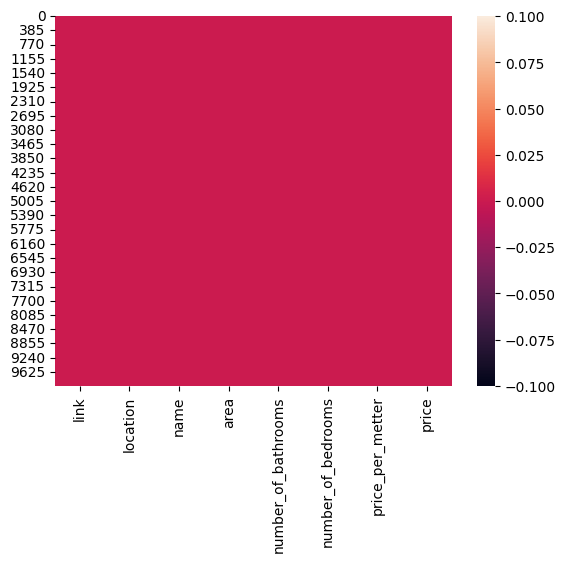

In [26]:
sns.heatmap(df.isnull())

In [27]:
(df.isnull().sum()/len(df))*100

link                   0.0
location               0.0
name                   0.0
area                   0.0
number_of_bathrooms    0.0
number_of_bedrooms     0.0
price_per_metter       0.0
price                  0.0
dtype: float64

Sau khi đã xử lý xong giá trị bị thiếu, ta thấy rằng đã không còn cột nào trong bộ dữ liệu bị thiếu giá trị nữa.

- Tiếp đến, sử dụng boxplot() kiểm tra xem có giá trị ngoại lệ nào hiện đang trong bộ dữ liệu:

<Axes: >

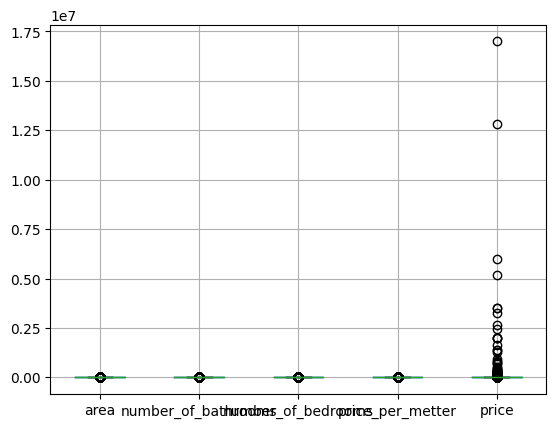

In [28]:
df.boxplot()

- Ta thấy rằng ở cột 'price' xuất hiện nhiều các giá trị ngoại lệ, vì thế ta sẽ tính toán q1, q3 và IQR để tiến hành xử lý, xóa đi những giá trị này:

In [29]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
IQR

df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]

df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_4988\2347966237.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\USER\AppData\Local\Temp\ipykernel_4988\2347966237.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)
C:\Users\USER\AppData\Local\Temp\ipykernel_4988\2347966237.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]


link             location  \
0  https://meeyland.com//cuc-pham-cau-giay-vo-chi...     Cầu Giấy, Hà Nội   
1  https://meeyland.com//ban-nha-thanh-dam-long-l...    Hoàng Mai, Hà Nội   
2  https://meeyland.com//ban-nha-2-tang-kiet-o-to...  Liên Chiểu, Đà Nẵng   
3  https://meeyland.com//ban-nha-ngoc-thuy-long-b...    Long Biên, Hà Nội   
4  https://meeyland.com//gap-ban-nha-hem-745-xe-o...  Gò Vấp, Hồ Chí Minh   

                                                name  area  \
0  Cực phẩm Cầu Giấy, Võ Chí Công full nội thất 3...  34.0   
1  Bán nhà Thanh Đàm long lanh ở ngay ô tô dừng đ...  97.0   
2  Bán nhà 2 tầng kiệt Ô TÔ K382 Tôn Đức Thắng, H...  63.0   
3                      Bán nhà Ngọc Thụy - Long Biên  33.0   
4  Gấp bán nhà hẻm 745 xe o to đổ cửa Quang Trung...  30.0   

   number_of_bathrooms  number_of_bedrooms  price_per_metter     price  
0                  3.0                 3.0            138.24   4700.16  
1                  3.2                 4.0            126.80  12299.60  
2                  3.0                 3.0             40.48   2550.24  
3                  3.2                 3.8            118.18   3899.94  
4                  3.0                 3.0            133.33   3999.90

- Kiểm tra lại bộ dữ liệu sau khi xử lý:

<Axes: >

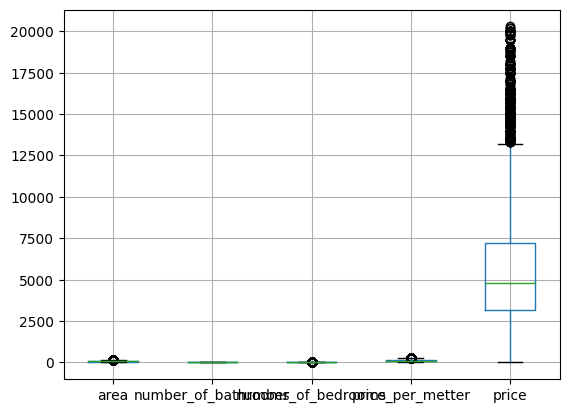

In [30]:
df.boxplot()

In [31]:
df.shape

(7803, 8)

Ta thấy rằng không còn cột dữ liệu nào vướng giá trị ngoại lệ nữa và sau khi kiểm tra với shape ta cũng thấy rằng giá trị ngoại lệ đã bị lọc đi đáng kể chỉ còn 7803 giá trị.

### Khám phá dữ liệu - Trực quan hóa dữ liệu:

In [32]:
df['location'].value_counts()

Đống Đa, Hà Nội          522
Long Biên, Hà Nội        461
Gò Vấp, Hồ Chí Minh      439
Bình Tân, Hồ Chí Minh    378
Tân Phú, Hồ Chí Minh     340
                        ... 
Lạng Sơn, Lạng Sơn         1
Quảng Yên, Quảng Ninh      1
Bảo Lộc, Lâm Đồng          1
Chợ Mới, An Giang          1
Tam Dương, Vĩnh Phúc       1
Name: location, Length: 129, dtype: int64

Ở khu vực Đống Đa - Hà Nội, Gò Vấp - Hồ Chí Minh, Long Biên - Hà Nội là 3 vị trí/ địa điểm có số lượt bán nhà nhiều nhất với 522 lần, 461 lần, 439 lần

In [33]:
px.histogram(df, x='location', color='location', title='Biểu đồ thể hiện số lượt bán nhà theo khu vực')

- Vẽ biểu đồ thể hiện giá nhà theo từng khu vực/ địa điểm:

In [34]:
px.bar(df, x='location', y='price', color='location', title='Biểu đồ thể hiện giá nhà theo khu vực')

- Vẽ biểu đồ scatter thể hiện mối tương quan giữa diện tích nhà đất với giá trên một mét vuông đất:

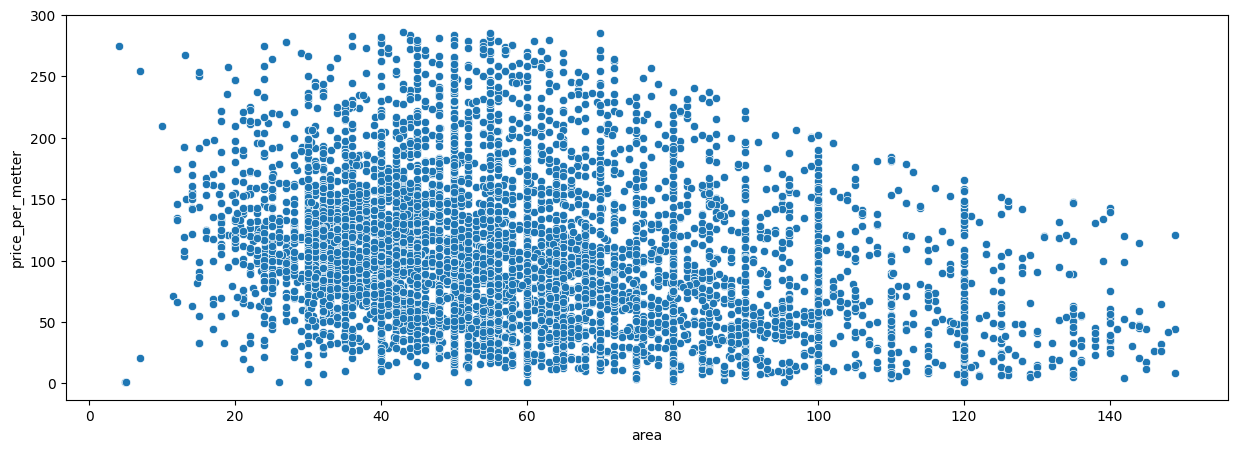

In [35]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x="area", y="price_per_metter", data=df)
plt.show()

Ta thấy rằng hai cột này có một mối tương quan rất lớn, khi các dấu chấm liên tục dính lại sát bên nhau.

- Vẽ biểu đồ thể hiện top những nhà có giá nhà trung bình cao cùng số lượng phòng ngủ:

Text(0.5, 0, 'Số lượng phòng ngủ')

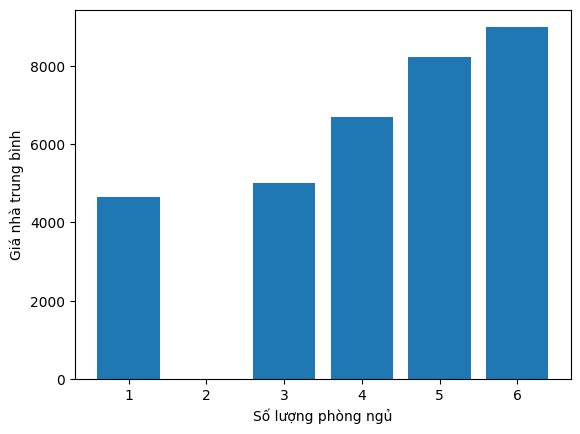

In [36]:
df_bed = df.copy()
df_bed['number_of_bedrooms'] = np.round(df_bed['number_of_bedrooms'])
plt.bar(x=df_bed.groupby('number_of_bedrooms')['price'].agg('mean').sort_values(ascending=False).head().index,height=df_bed.groupby('number_of_bedrooms')['price'].agg('mean').sort_values(ascending=False).head())
plt.ylabel('Giá nhà trung bình')
plt.xlabel('Số lượng phòng ngủ')

- Biểu đồ thể hiện số lượng phòng ngủ:

<Axes: xlabel='number_of_bedrooms', ylabel='Count'>

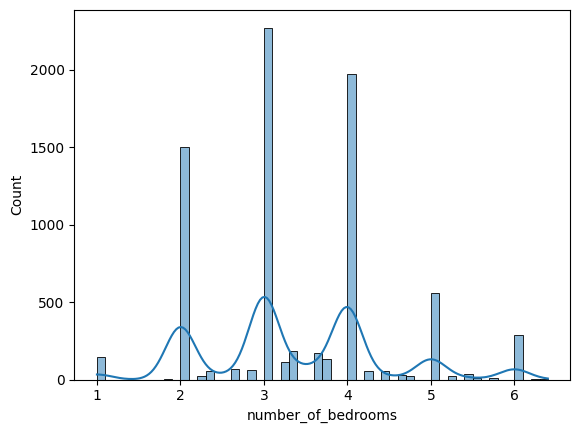

In [37]:
sns.histplot(df['number_of_bedrooms'], kde=True)

- Biểu đồ biểu hiện số lượng phòng tắm:

<Axes: xlabel='number_of_bathrooms', ylabel='Count'>

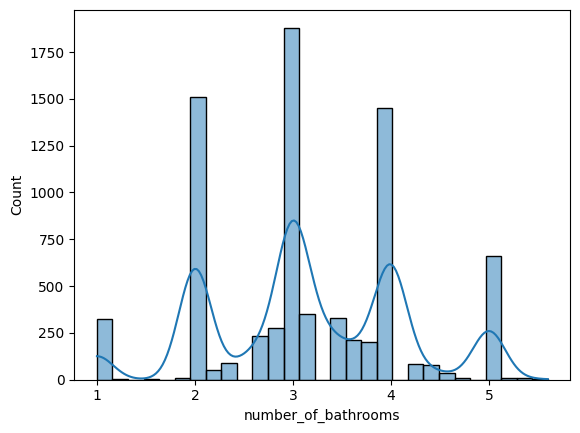

In [38]:
sns.histplot(df['number_of_bathrooms'], kde=True)

- Vẽ biểu đồ thể hiện tổng giá nhà theo từng khu vực (location):

In [39]:
px.histogram(df, x='price', y='location', title='Biểu đồ thể hiện tổng giá nhà theo khu vực')

- Top 10 các khu vực có giá nhà trung bình cao nhất:

In [40]:
df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).head(10)

location
Tam Dương, Vĩnh Phúc        18750.312000
Quảng Yên, Quảng Ninh       17700.120000
Phủ Lý, Hà Nam              14000.400000
Sa Pa, Lào Cai              13900.082500
Tuy Hòa, Phú Yên            11000.400000
Hạ Long, Quảng Ninh         10755.758560
Quy Nhơn, Bình Định         10625.347500
Thái Nguyên, Thái Nguyên    10165.774680
Quận 2, Hồ Chí Minh         10028.323391
Phú Quốc, Kiên Giang         8334.915000
Name: price, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Tam Dương, Vĩnh Phúc'),
  Text(1, 0, 'Quảng Yên, Quảng Ninh'),
  Text(2, 0, 'Phủ Lý, Hà Nam'),
  Text(3, 0, 'Sa Pa, Lào Cai'),
  Text(4, 0, 'Tuy Hòa, Phú Yên'),
  Text(5, 0, 'Hạ Long, Quảng Ninh'),
  Text(6, 0, 'Quy Nhơn, Bình Định'),
  Text(7, 0, 'Thái Nguyên, Thái Nguyên'),
  Text(8, 0, 'Quận 2, Hồ Chí Minh'),
  Text(9, 0, 'Phú Quốc, Kiên Giang')])

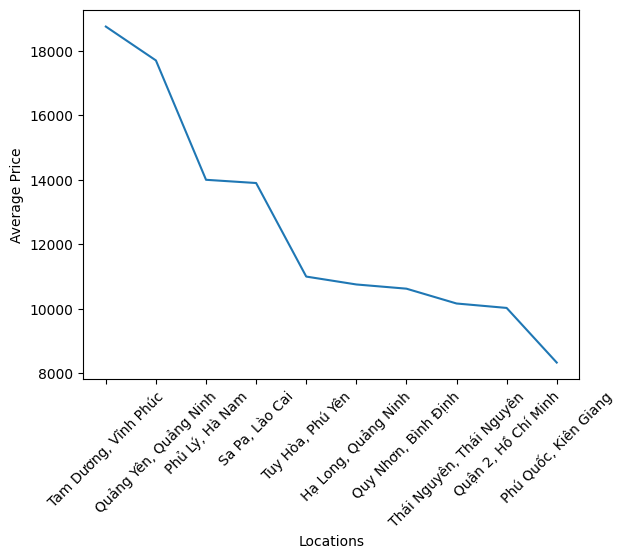

In [41]:
plt.plot(df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('Locations')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

- Top 10 khu vực có giá nhà trung bình thấp nhất:

In [42]:
df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).tail(10)

location
Châu Thành, Kiên Giang    1000.000
Châu Thành, Bến Tre        979.435
Bảo Lộc, Lâm Đồng          899.650
Bảo Lâm, Lâm Đồng          880.000
Chơn Thành, Bình Phước     849.160
Cần Đước, Long An          814.335
Hòa Thành, Tây Ninh        750.120
Tây Ninh, Tây Ninh         684.840
Bình Minh, Vĩnh Long       619.880
Phụng Hiệp, Hậu Giang      150.400
Name: price, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Châu Thành, Kiên Giang'),
  Text(1, 0, 'Châu Thành, Bến Tre'),
  Text(2, 0, 'Bảo Lộc, Lâm Đồng'),
  Text(3, 0, 'Bảo Lâm, Lâm Đồng'),
  Text(4, 0, 'Chơn Thành, Bình Phước'),
  Text(5, 0, 'Cần Đước, Long An'),
  Text(6, 0, 'Hòa Thành, Tây Ninh'),
  Text(7, 0, 'Tây Ninh, Tây Ninh'),
  Text(8, 0, 'Bình Minh, Vĩnh Long'),
  Text(9, 0, 'Phụng Hiệp, Hậu Giang')])

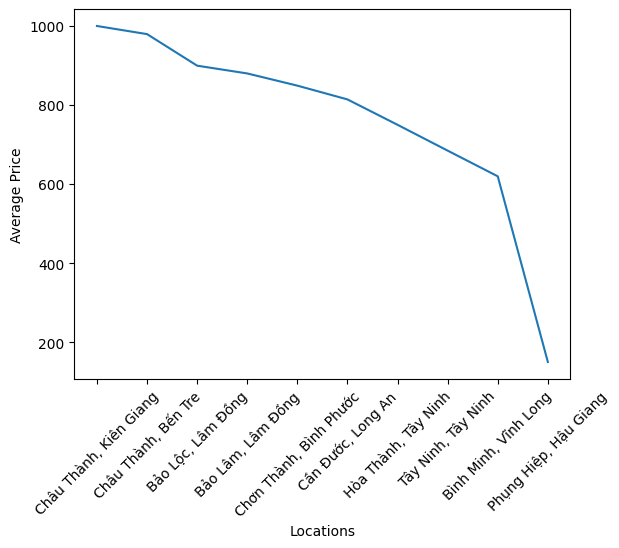

In [43]:
plt.plot(df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).tail(10))
plt.xlabel('Locations')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

- Top 10 khu vực có giá nhà trung bình trên mỗi mét vuông cao nhất:

Text(0, 0.5, 'Average Price Per Metter')

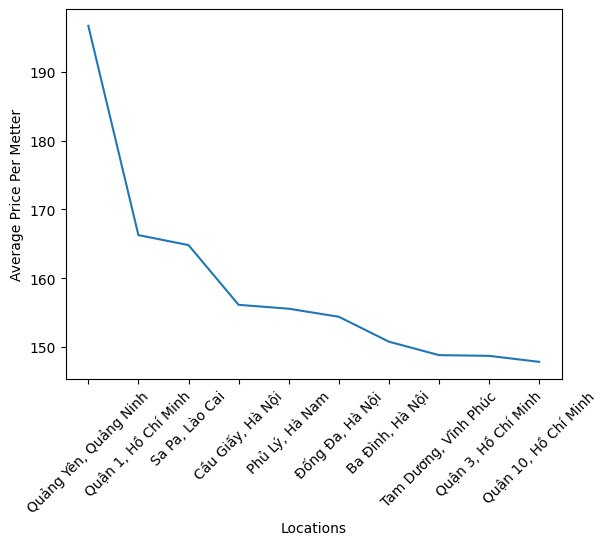

In [44]:
plt.plot(df.groupby(by='location')['price_per_metter'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Average Price Per Metter')

- Top 10 khu vực có giá nhà trung bình trên mỗi mét vuông thấp nhất:

Text(0, 0.5, 'Average Price Per Metter')

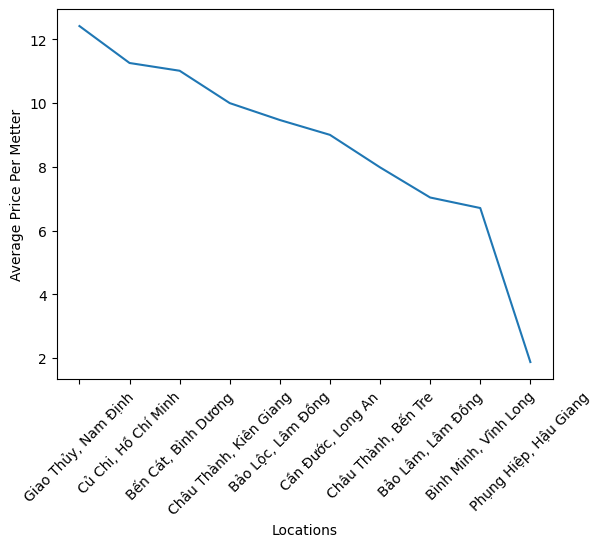

In [45]:
plt.plot(df.groupby(by='location')['price_per_metter'].agg('mean').sort_values(ascending=False).tail(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Average Price Per Metter')

- Top 10 các khu vực có diện tích đất cao nhất:

Text(0, 0.5, 'Average Area')

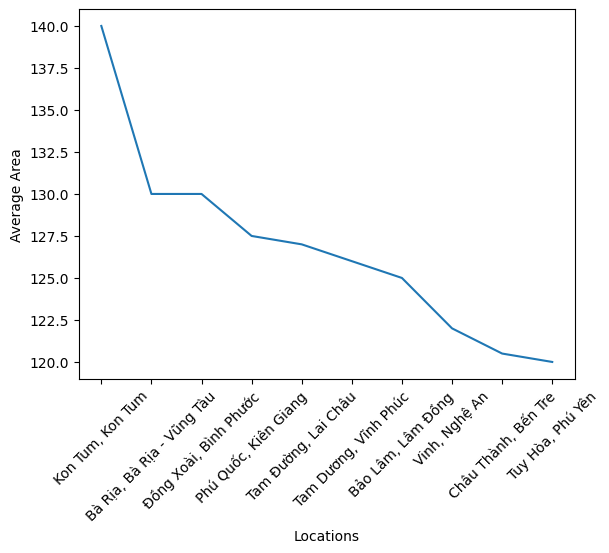

In [46]:
plt.plot(df.groupby(by='location')['area'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Average Area')

- Top 10 các khu vực có diện tích đất thấp nhất:

Text(0, 0.5, 'Average Area')

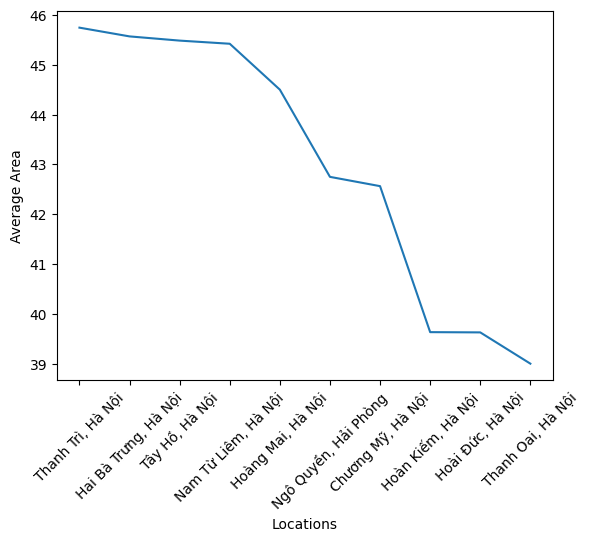

In [47]:
plt.plot(df.groupby(by='location')['area'].agg('mean').sort_values(ascending=False).tail(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Average Area')

- Vẽ biểu đồ tương quan thể hiện giá nhà theo diện tích từng khu vực:

In [48]:
px.scatter(df, x='area', y='price', color='location', title='Biểu đồ thể hiện giá nhà theo diện tích')

- Vẽ biểu đồ scatter thể hiện giá nhà theo giá nhà trên mỗi mét vuông ở từng khu vực:

In [49]:
px.scatter(df, x='price_per_metter', y='price', color='location', title='Biểu đồ thể hiện giá nhà theo giá nhà trên mỗi mét vuông ở từng khu vực')

- Qua một số các biểu đồ trực quan, khám phá dữ liệu ở trên. Ta có thể nhận thấy rằng, cột 'name' và cột 'link' không thật sự cần thiết trong quá trình phân tích vì nó chỉ là tên bài báo và link của bài báo đó, vì vậy ta sẽ bỏ 2 cột này:

In [50]:
df = df.drop(['link', 'name'], axis=1)

In [51]:
df

location   area  number_of_bathrooms  number_of_bedrooms  \
0            Cầu Giấy, Hà Nội   34.0                  3.0                 3.0   
1           Hoàng Mai, Hà Nội   97.0                  3.2                 4.0   
2         Liên Chiểu, Đà Nẵng   63.0                  3.0                 3.0   
3           Long Biên, Hà Nội   33.0                  3.2                 3.8   
4         Gò Vấp, Hồ Chí Minh   30.0                  3.0                 3.0   
...                       ...    ...                  ...                 ...   
9991          Hà Đông, Hà Nội   35.0                  3.8                 3.2   
9993  Bình Thạnh, Hồ Chí Minh   73.7                  3.0                 3.0   
9995     Tân Phú, Hồ Chí Minh   71.0                  5.0                 4.0   
9996      Quận 9, Hồ Chí Minh  104.0                  3.0                 3.6   
9999    Bình Tân, Hồ Chí Minh  100.0                  2.8                 3.4   

      price_per_metter      price  
0               138.24   4700.160  
1               126.80  12299.600  
2                40.48   2550.240  
3               118.18   3899.940  
4               133.33   3999.900  
...                ...        ...  
9991            177.14   6199.900  
9993             43.28   3189.736  
9995             91.55   6500.050  
9996             47.60   4950.400  
9999            149.00  14900.000  

[7803 rows x 6 columns]

- Tiếp theo, ta sẽ tiến hành vẽ biểu đồ heatmap để xem mức độ tương quan giữa các thuộc tính định lượng trong bộ dữ liệu:

C:\Users\USER\AppData\Local\Temp\ipykernel_4988\3541585420.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



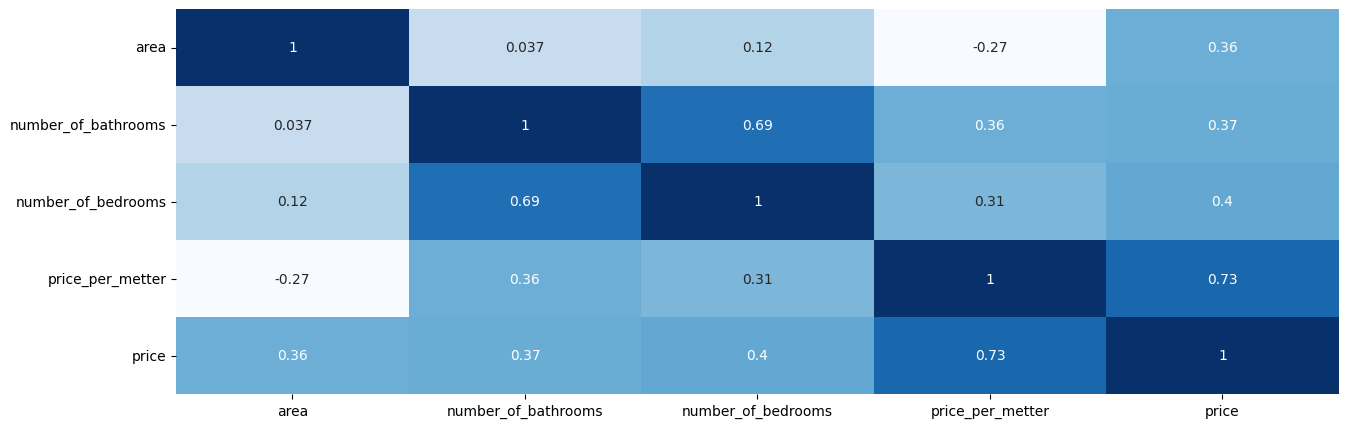

In [52]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='Blues')
plt.show()

Dựa vào biểu đồ nhiệt ở trên, ta thấy rằng:

- Cặp biến có tương quan dương nghĩa là khi một biến tăng, biến kia cũng tăng.
Ở đây, ta thấy number_of_bathrooms và number_of_bedrooms có tương quan dương mạnh (0.690052), có nghĩa là khi số phòng tắm tăng, số phòng ngủ cũng tăng.

- Cặp biến có tương quan âm nghĩa là khi một biến tăng, biến kia giảm.
Ta thấy area và price_per_metter có tương quan âm (-0.272394), có nghĩa là khi diện tích tăng, giá trị trung bình của từng mét vuông giảm.

- price_per_metter và price có tương quan mạnh (0.730942), cho thấy giá trị trung bình của từng mét vuông có mối quan hệ mạnh mẽ với giá nhà.

- number_of_bathrooms và area có tương quan yếu (0.036571), chỉ ra rằng số lượng phòng tắm không có tương quan đáng kể với diện tích.

### Cuối cùng, ta đến bước chuẩn hóa (chia tập dữ liệu thành train - test để tiến hành mô hình hóa dữ liệu):

In [53]:
df.head()

location  area  number_of_bathrooms  number_of_bedrooms  \
0     Cầu Giấy, Hà Nội  34.0                  3.0                 3.0   
1    Hoàng Mai, Hà Nội  97.0                  3.2                 4.0   
2  Liên Chiểu, Đà Nẵng  63.0                  3.0                 3.0   
3    Long Biên, Hà Nội  33.0                  3.2                 3.8   
4  Gò Vấp, Hồ Chí Minh  30.0                  3.0                 3.0   

   price_per_metter     price  
0            138.24   4700.16  
1            126.80  12299.60  
2             40.48   2550.24  
3            118.18   3899.94  
4            133.33   3999.90

Có thể thấy rằng, cột 'location' hiện tại đang lưu các giá trị kiểu chữ vì thế, để tiến hành chuẩn hóa và chia tập huấn luyện, kiểm thử trước hết ta phải chuẩn hóa cột 'location' về dạng số 

- Sử dụng phương thức get_dummies của pandas để mã hóa biến phân loại "location" thành các cột dummies (one-hot encoding) và kết hợp chúng với DataFrame gốc.

In [54]:
data_encoded_refernce = pd.get_dummies(df, columns=['location'])
data_encoded_refernce.head()

area  number_of_bathrooms  number_of_bedrooms  price_per_metter     price  \
0  34.0                  3.0                 3.0            138.24   4700.16   
1  97.0                  3.2                 4.0            126.80  12299.60   
2  63.0                  3.0                 3.0             40.48   2550.24   
3  33.0                  3.2                 3.8            118.18   3899.94   
4  30.0                  3.0                 3.0            133.33   3999.90   

   location_An Dương, Hải Phòng  location_Ba Đình, Hà Nội  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   location_Biên Hòa, Đồng Nai  location_Buôn Ma Thuột, Đắk Lắk  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   location_Bà Rịa, Bà Rịa - Vũng Tàu  ...  \
0                                   0  ...   
1                                   0  ...   
2                                   0  ...   
3                                   0  ...   
4                                   0  ...   

   location_Vũng Tàu, Bà Rịa - Vũng Tàu  location_Vị Thanh, Hậu Giang  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   

   location_Ý Yên, Nam Định  location_Điện Bàn, Quảng Nam  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   location_Đà Lạt, Lâm Đồng  location_Đông Anh, Hà Nội  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   location_Đống Đa, Hà Nội  location_Đồng Xoài, Bình Phước  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   location_Đức Hòa, Long An  location_Đức Trọng, Lâm Đồng  
0                          0                             0  
1                          0                             0  
2                          0                             0  
3                          0                             0  
4                          0                             0  

[5 rows x 134 columns]

Sau khi xử lý xong, có thể thấy rằng các giá trị ở 'location' đã được phân ra thành các cột riêng lẻ mang giá trị số của từng khu vực khi xử lý.

- Chuẩn hóa xong dữ liệu, ta tiến thành phân chia tập train, test bắt đầu thực hiện phân tích dữ liệu:

In [55]:
test_size = int(0.2 * len(df))

# Tạo tập test bằng cách lấy ngẫu nhiên các mẫu
test_indices = data_encoded_refernce.sample(test_size, random_state=42).index
test_df = data_encoded_refernce.loc[test_indices]

# Tạo tập train bằng cách loại bỏ các mẫu của tập test
train_df = data_encoded_refernce.drop(test_indices)

# Kiểm tra kích thước của tập train và tập test
print("Kích thước tập train:", train_df.shape)
print("Kích thước tập test:", test_df.shape)

Kích thước tập train: (6243, 134)
Kích thước tập test: (1560, 134)


## Câu 2: Mô hình

- Xây dựng kiến trúc mạng (không dùng thư viện model)

- Huấn luyện mô hình

- Vẽ biểu đồ đánh giá, bảng so sánh

- Tinh chỉnh lại mô hình (2, 3 cái)

### Về giải thuật K-means trong việc phân nhóm các đặc trưng với giá nhà bất động sản:
- Trước tiên, định nghĩa các hàm sử dụng trong giải thuật K-means:

In [56]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

def kmeans_display(X, label):
    centers = kmeans_init_centers(X, K)
    K = np.amax(label) + 1
    for k in range(K):
        Xk = X[label == k, :]
        plt.scatter(Xk[:, 0], Xk[:, 1], label=f'Cluster {k}', s=30, alpha=0.8)

    plt.scatter(centers[-1][:, 0], centers[-1][:, 1], marker='X', color='red', s=250, label='Centroids')
    plt.legend()
    plt.title('K-means Clustering')
    plt.show()

def elbow_k(X, max_k):
    inertias = []  # Danh sách lưu giá trị quán tính

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Vẽ biểu đồ quán tính
    plt.plot(range(1, max_k+1), inertias, marker='o')
    plt.xlabel('Số lượng cụm (k)')
    plt.ylabel('Quán tính')
    plt.title('Phương pháp Elbow để chọn số lượng cụm tối ưu')
    plt.show()

    return inertias

- Sau khi đã định nghĩa các hàm cần thiết cho việc huấn luyện, ta tiến hành huấn luyện mô hình:

. Phân nhóm với diện tích 'area' và giá nhà 'price':

- Sử dụng phương pháp Elbow để chọn số cụm tối ưu:

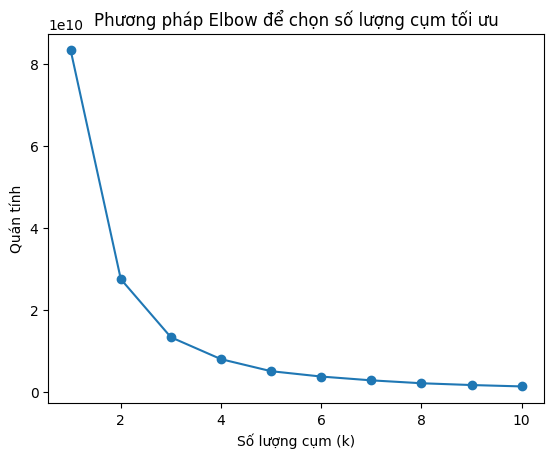

In [57]:
max_itr = 10
interation = elbow_k(train_df[['area', 'price']].values, max_itr)

Sau khi sử dụng phương pháp Elbow để chọn cụm tối ưu, ta thấy rằng cụm k = 2 là số lượng cụm tối ưu nhất cho việc phâm nhóm này và cũng như nếu có thể ta cũng có thể phân với k = 3 hay k = 4,...tùy vào mong muốn của mình.

Centers được tìm thấy sau 6 lần lặp:
[[   53.21314077  4249.84895152]
 [   72.86233988 11908.92220128]]


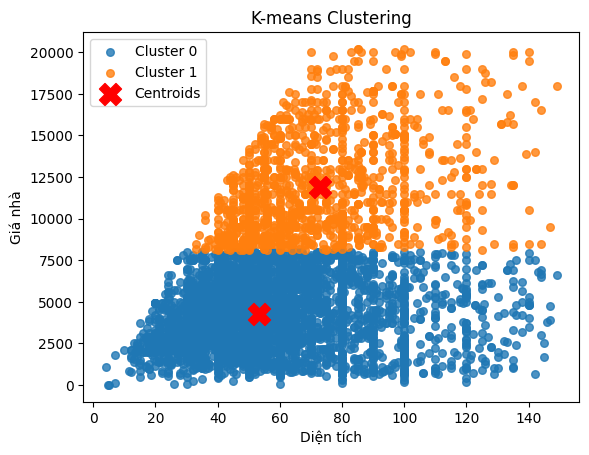

In [58]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['area', 'price']].values, labels[-1])

Ta thấy rằng sau khi đã phân nhóm diện tích với giá nhà với số cụm là hai thì thông qua biểu đồ trên, ta cũng xem xét được rằng các cụm (cluster) được phân bố khá đồng đều với nhau. Do đó, để xác định rõ ràng hơn ta có thể tiến hành phân nhóm với số cụm 3 để xem xét việc phân nhóm đặc trưng diện tích (feature) với giá nhà (target) có rõ ràng và phân bố đều như số cụm là 2 hay không:

Centers được tìm thấy sau 7 lần lặp:
[[   50.55446546  3255.18067954]
 [   77.23216783 13671.88065231]
 [   60.62448259  7046.52365007]]


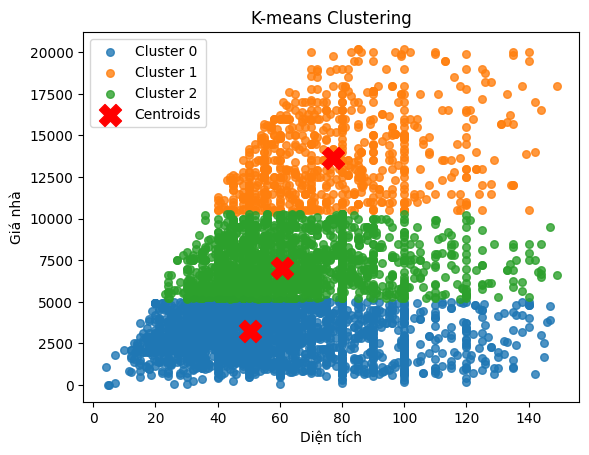

In [59]:
K = 3
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['area', 'price']].values, labels[-1])

Với số cụm là 3 thì việc phân nhóm giữa biến đặc trưng với biến mục tiêu là khá tốt và đồng bộ với nhau tuy vẫn còn vài chấm nó hơi lưa thưa ra ngoài nhưng vẫn cho thấy rằng nhóm này được phân khá tốt với nhau.

. Phân nhóm đặc trưng price_per_metter với giá nhà mục tiêu:

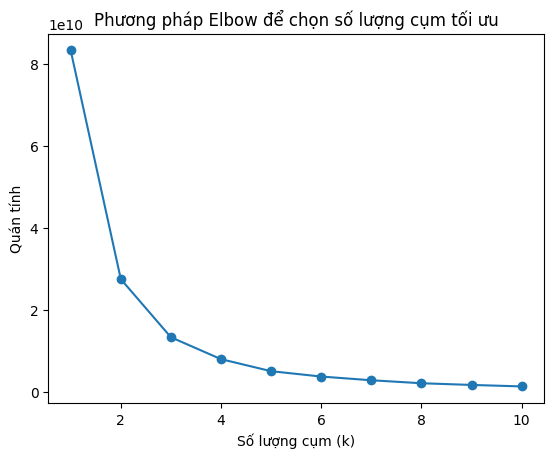

In [60]:
interation = elbow_k(train_df[['price_per_metter', 'price']].values, max_itr)

Tương tự như phân nhóm giữa diện tích với giá nhà, thì phân nhóm giữa giá nhà trên mỗi mét vuông với giá nhà cũng có số cụm tối ưu là 2, do đó:

Centers được tìm thấy sau 14 lần lặp:
[[   90.80879306  4247.58451018]
 [  173.88225213 11899.12768118]]


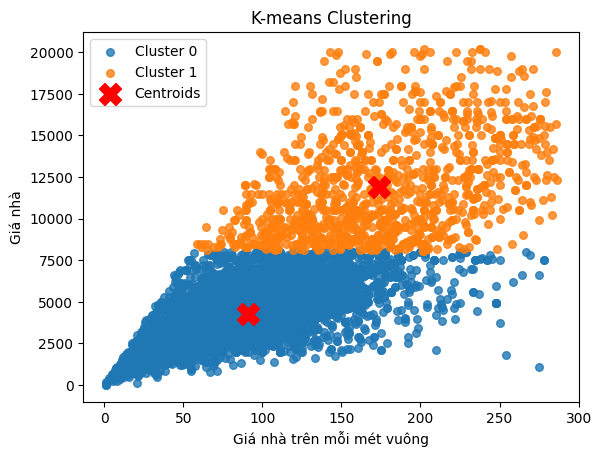

In [61]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Giá nhà trên mỗi mét vuông')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['price_per_metter', 'price']].values, labels[-1])

Việc phân nhóm với số cụm là hai cũng cho thấy điều tương tự như phân nhóm với diện tích và giá nhà, ta thấy rằng 2 cụm đều phân bố khá đều và cũng như là hoạt động tốt với nhau. Tiếp tục thử với cụm = 3:

Centers được tìm thấy sau 17 lần lặp:
[[  127.03890568  6965.32672016]
 [  187.6908513  13588.970197  ]
 [   76.59769697  3224.33499443]]


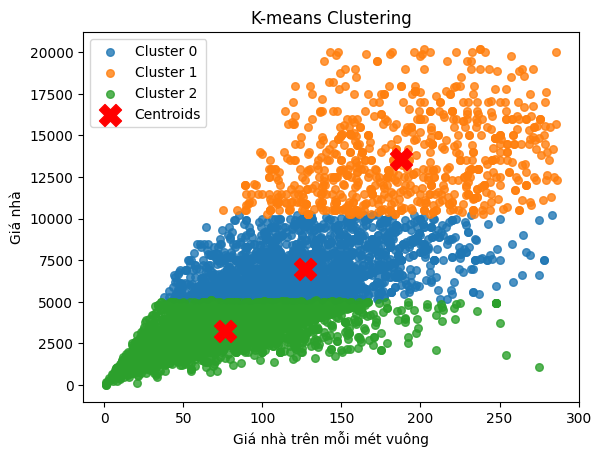

In [62]:
K = 3
interations = []
centers, labels, iterations = kmeans(train_df[['price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Giá nhà trên mỗi mét vuông')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['price_per_metter', 'price']].values, labels[-1])

Ở phân nhóm với cụm bằng 3 này, ta thấy rõ ở cụm 1 và 2 thì nó phân nhóm khá tốt nhưng đến cụm 3 thì nó có các giá trị bị bung khá nhiều, tuy nhiên nó vẫn hoạt động tốt khi phân nhóm như thế.

. Phân nhóm đặc trưng phòng ngủ với giá nhà mục tiêu:

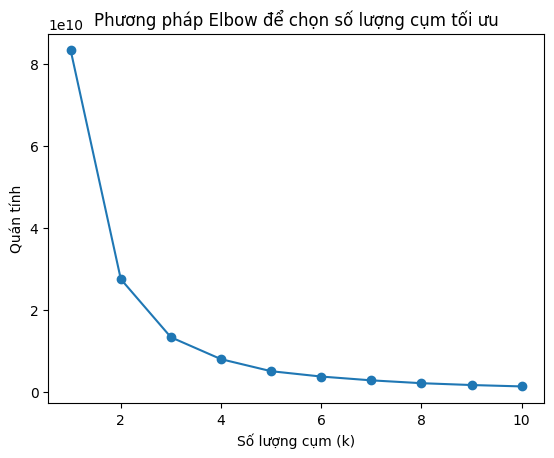

In [63]:
interation = elbow_k(train_df[['number_of_bedrooms', 'price']].values, max_itr)

Tương tự như 2 lần phân nhóm ở trên, số cụm tối đa tốt nhất mà ta có thể phân là 2 cụm:

Centers được tìm thấy sau 13 lần lặp:
[[3.22126652e+00 4.24758451e+03]
 [3.96524702e+00 1.18991277e+04]]


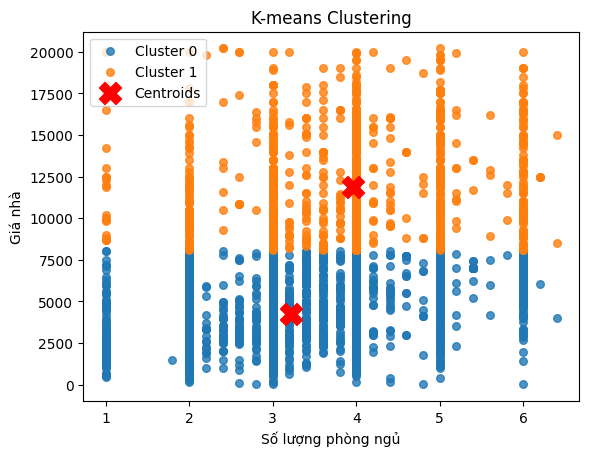

In [64]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['number_of_bedrooms', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Số lượng phòng ngủ')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['number_of_bedrooms', 'price']].values, labels[-1])

Nhìn vào biểu đồ trên, ta có thể thấy ngay rằng việc phân nhóm với đặc trưng 'number_of_bedrooms' nó không tốt và cũng như không phân bố đồng đều với nhau nên ta sẽ không dùng nó để gán hết tổng các biến đặc trưng với biến mục tiêu.

. Phân nhóm đặc trưng phòng tắm với giá nhà:

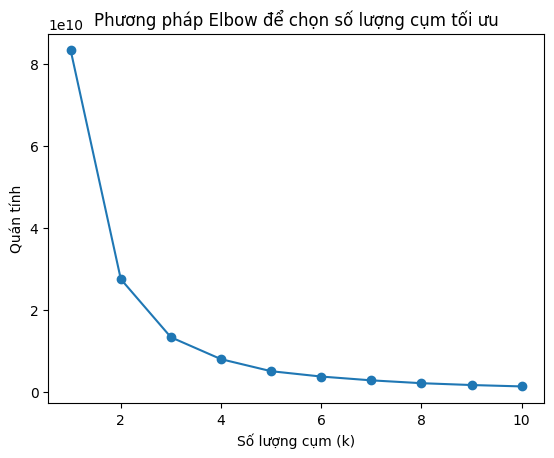

In [65]:
interation = elbow_k(train_df[['number_of_bathrooms', 'price']].values, max_itr)

Centers được tìm thấy sau 13 lần lặp:
[[3.63253833e+00 1.18991277e+04]
 [3.03803512e+00 4.24758451e+03]]


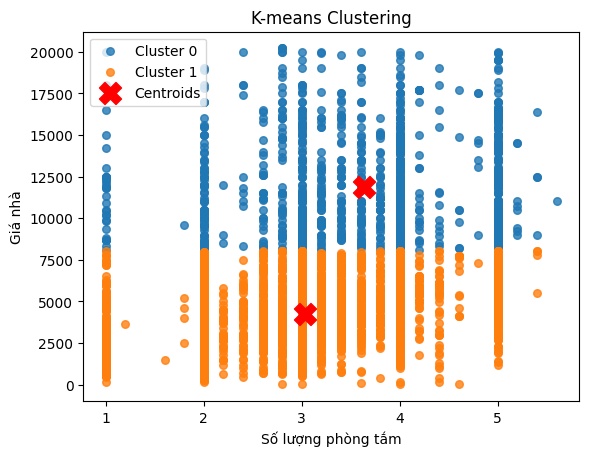

In [66]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['number_of_bathrooms', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Số lượng phòng tắm')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['number_of_bathrooms', 'price']].values, labels[-1])

Tương tự với phòng ngủ thì phòng tắm cũng không phân nhóm tốt cho nên ta cũng sẽ không sử dụng tới.

. Phân nhóm khu vực với giá nhà:

In [67]:
train_df.columns

Index(['area', 'number_of_bathrooms', 'number_of_bedrooms', 'price_per_metter',
       'price', 'location_An Dương, Hải Phòng', 'location_Ba Đình, Hà Nội',
       'location_Biên Hòa, Đồng Nai', 'location_Buôn Ma Thuột, Đắk Lắk',
       'location_Bà Rịa, Bà Rịa - Vũng Tàu',
       ...
       'location_Vũng Tàu, Bà Rịa - Vũng Tàu', 'location_Vị Thanh, Hậu Giang',
       'location_Ý Yên, Nam Định', 'location_Điện Bàn, Quảng Nam',
       'location_Đà Lạt, Lâm Đồng', 'location_Đông Anh, Hà Nội',
       'location_Đống Đa, Hà Nội', 'location_Đồng Xoài, Bình Phước',
       'location_Đức Hòa, Long An', 'location_Đức Trọng, Lâm Đồng'],
      dtype='object', length=134)

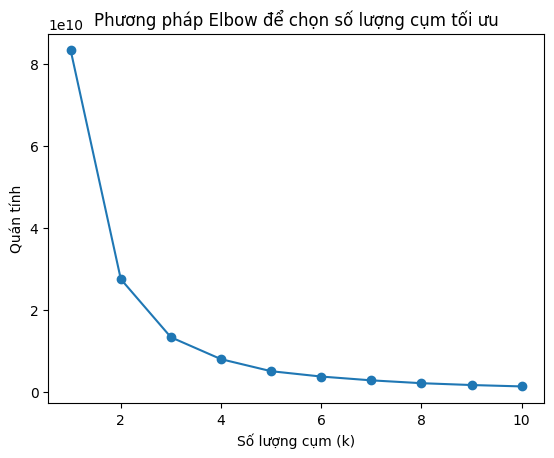

In [68]:
interation = elbow_k(train_df[['location_Biên Hòa, Đồng Nai', 'price']].values, max_itr)

Centers được tìm thấy sau 13 lần lặp:
[[1.49930953e-02 4.24758451e+03]
 [2.55536627e-03 1.18991277e+04]]


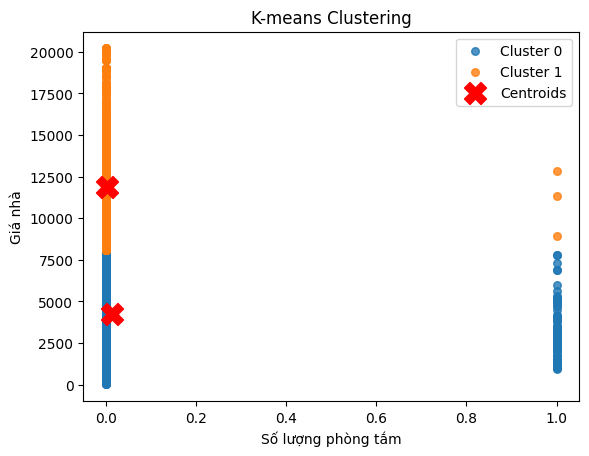

In [69]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['location_Biên Hòa, Đồng Nai', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Số lượng phòng tắm')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['location_Biên Hòa, Đồng Nai', 'price']].values, labels[-1])

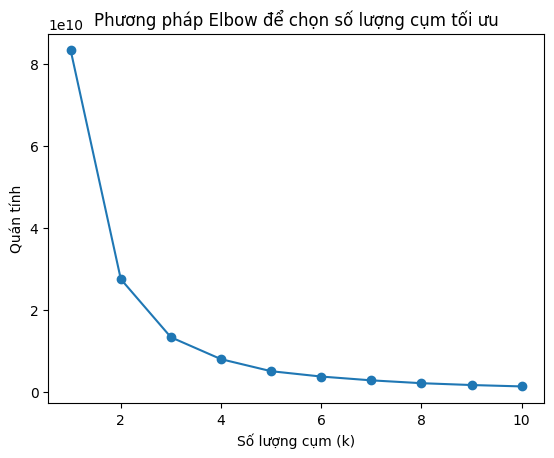

In [70]:
interation = elbow_k(train_df[['location_Đống Đa, Hà Nội', 'price']].values, max_itr)

Centers được tìm thấy sau 12 lần lặp:
[[1.09028961e-01 1.18991277e+04]
 [5.40540541e-02 4.24758451e+03]]


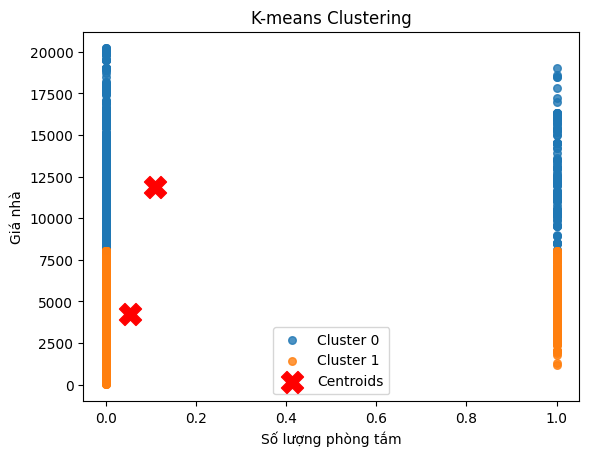

In [71]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['location_Đống Đa, Hà Nội', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Số lượng phòng tắm')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['location_Đống Đa, Hà Nội', 'price']].values, labels[-1])

Sau khi thử hai khu vực với giá nhà thì ta thấy rằng các gía trị biến đặc trưng trong 'location' khi chuẩn hóa xong vẫn không thích hợp cho việc phân nhóm với giá nhà. Các centroid bị lướt ra tận bên ngoài vùng giá trị. 

Vậy ta có thể kết luận rằng chỉ có hai biến đặc trưng thích hợp trong việc phân nhóm với giá nhà là: 'area', 'price_per_metter'.

. Phân nhóm với hai biến đặc trưng 'area', 'price_per_metter' với giá nhà 'price' mục tiêu:

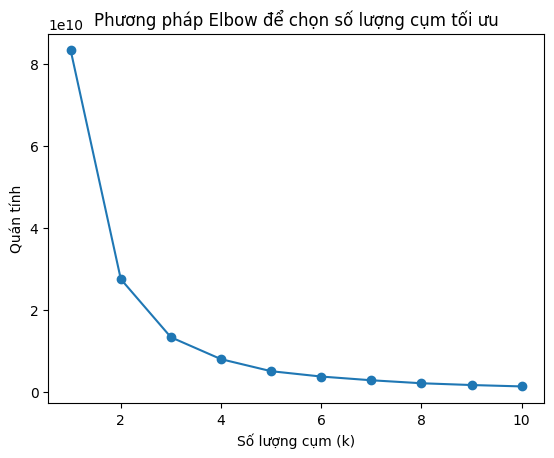

In [72]:
interation = elbow_k(train_df[['area', 'price_per_metter', 'price']].values, max_itr)

Số cụm tối ưu trong lần phân nhóm này vẫn là hai, tiếp theo ta sẽ tìm các trung tâm (centers) và vẽ biểu đồ:

Centers được tìm thấy sau 8 lần lặp:
[[   72.86233988   173.8104731  11908.92220128]
 [   53.21314077    90.87450158  4249.84895152]]


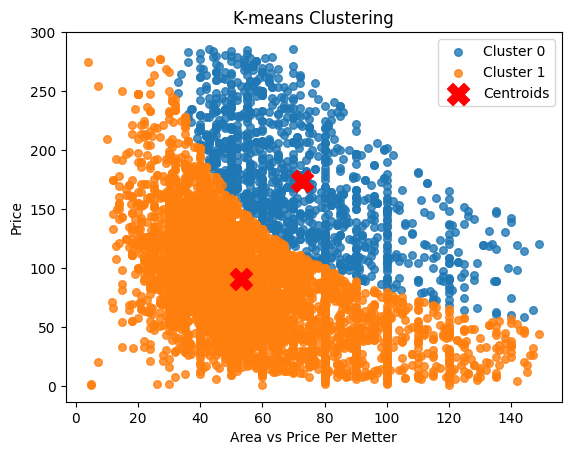

In [73]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area vs Price Per Metter')
plt.ylabel('Price')
kmeans_display(train_df[['area', 'price_per_metter', 'price']].values, labels[-1])

Ta có thể thấy rằng việc phân nhóm là khá tốt, các giá trị trong cụm cũng phân bố đồng đều theo nhóm. Tuy chỉ có cụm 0 là còn một ít giá trị tràn ra sang cụm 1 nhưng như vậy cũng là một kết quả tốt.

Ta cũng có thể thử phân nhóm với cụm = 3 như sau:

Centers được tìm thấy sau 16 lần lặp:
[[   60.22748797   127.03890568  6965.32672016]
 [   50.58238054    76.59769697  3224.33499443]
 [   77.03601637   187.6908513  13588.970197  ]]


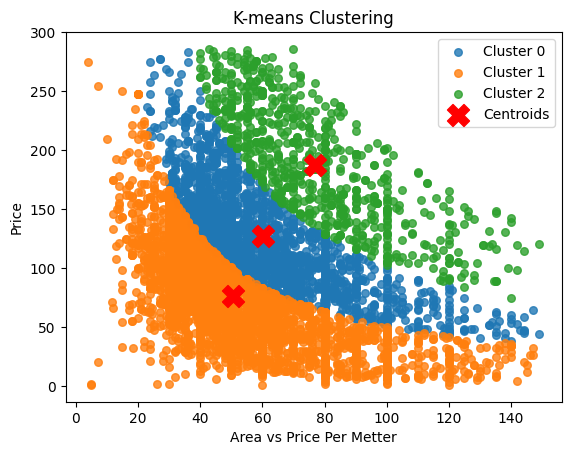

In [74]:
K = 3
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area vs Price Per Metter')
plt.ylabel('Price')
kmeans_display(train_df[['area', 'price_per_metter', 'price']].values, labels[-1])

Với số cụm là 3 thì cũng như số cụm 2 ở trên, vẫn còn số ít giá trị ở cụm 2 tràn sang cụm 0 tuy nhiên kết quả cho lần phân nhóm này vẫn là ổn định.

- Với số cụm là 4 thì việc phân nhóm vẫn rất tốt, vì thế có thể tùy theo tính chất của bài toán hay nhu cầu mà ta có thể chia thành các cụm bất kì để xử lý, giải quyết yêu cầu:

Centers được tìm thấy sau 18 lần lặp:
[[   64.72068966   147.3126931   8733.5720525 ]
 [   80.17109375   195.44726172 14751.89728437]
 [   54.03197645   107.1222439   5157.33291228]
 [   50.43648427    63.27365162  2531.93302503]]


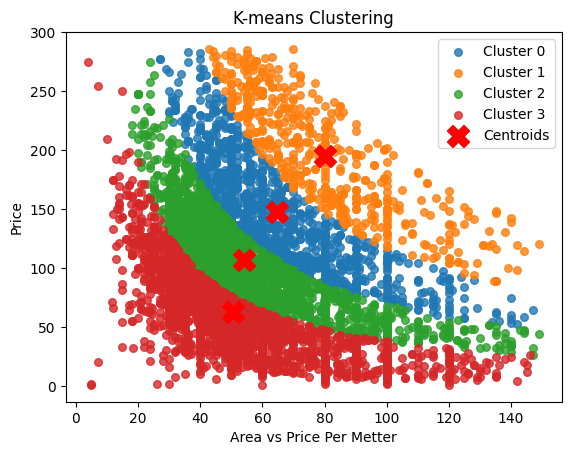

In [75]:
K = 4
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area vs Price Per Metter')
plt.ylabel('Price')
kmeans_display(train_df[['area', 'price_per_metter', 'price']].values, labels[-1])

#### Kết luận: Vậy ta có thể thấy khi sử dụng tập huấn luyện (training) để tiến hành huấn luyện mô hình K-means cho bài toán phân nhóm đặc trưng với giá nhà của chúng em thì cho thấy rằng có 2 cột dữ liệu là có thể tiến hành phân cụm hiệu quả với giá nhà và cũng như kích thước các cụm này cũng tương đối đồng đều với nhau, các trung tâm (centers) của các cụm đại diện có giá trị rất tốt khi luôn nằm giữa mỗi cụm được chia. Do đó với yêu cầu báo của nhóm em, em đã phân nhóm cho các đặc trưng và rút ra được một số đặc trưng có thể phân nhóm tốt với giá trị mục tiêu (price - giá nhà).

- Vậy với tập dữ liệu kiểm thử, nhóm em cũng sẽ trình bày những cột dữ liệu đặc trưng mà đã tiến hành huấn luyện ở tập training để kiểm tra lại xem có thật sự tốt hay không sau khi huấn luyện:

. Với Area:

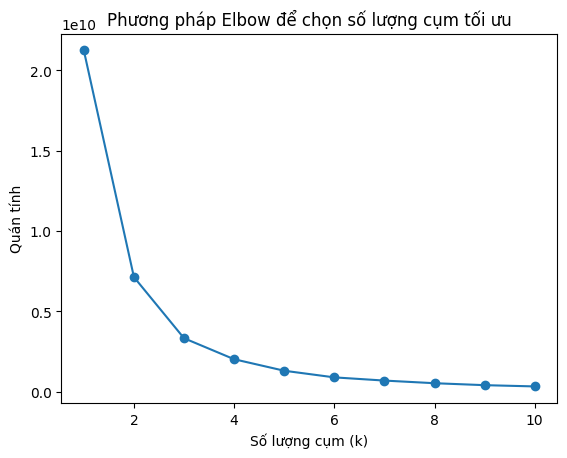

In [76]:
interation = elbow_k(test_df[['area', 'price']].values, max_itr)

Với tập kiểm thử, tuy số lượng quán tính giảm nhiều hơn so với tập huấn luyện nhưng số cụm tối ưu vẫn là 2:

Centers được tìm thấy sau 6 lần lặp:
[[   74.66891892 11945.24910135]
 [   53.62456487  4277.2846769 ]]


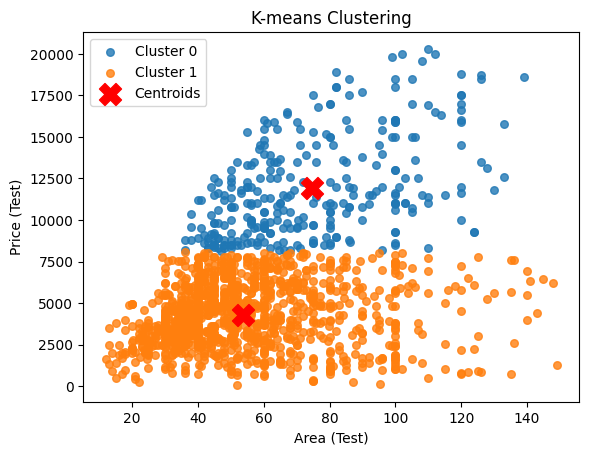

In [77]:
K = 2
interations = []
centers, labels, iterations = kmeans(test_df[['area', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['area', 'price']].values, labels[-1])

Dựa vào biểu đồ, mình có thể thấy cụm 1 nó hơi tràn dữ liệu ra bên ngoài trung tâm cụm nhưng cụm 0 thì khá đồng đều. Tuy nhiên đây vẫn là phân nhóm khá ổn, bây giờ ta sẽ thử K = 3: 

Centers được tìm thấy sau 14 lần lặp:
[[   60.74115523  6862.79094946]
 [   49.92585995  3124.89927518]
 [   81.21458333 13524.10088333]]


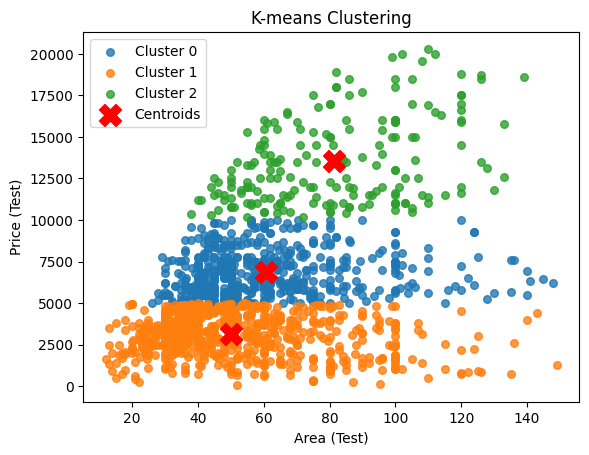

In [78]:
K = 3
interations = []
centers, labels, iterations = kmeans(test_df[['area', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['area', 'price']].values, labels[-1])

Khi phân cụm với K = 3 thì ta thấy rõ ở cụm số 2 (xanh lá) các giá trị trong cụm nó bị thưa ra rất nhiều so với hai cụm 0 và cụm 1. Và cụm 1 cũng có tình trạng bung dữ liệu ra khá nhiều. Tuy nhiên các giá trị vẫn được phân ra khá đều ở mỗi cụm.

. Với Price_Per_Metter:

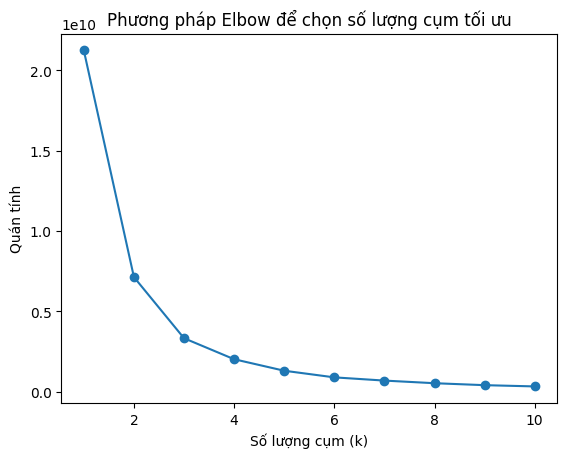

In [79]:
interation = elbow_k(test_df[['price_per_metter', 'price']].values, max_itr)

Số cụm tối ưu dựa theo phương pháp elbow là 2, tuy nhiên em sẽ chọn cụm là 3 để có cái nhìn tổng quan nhất:

Centers được tìm thấy sau 16 lần lặp:
[[   76.31800983  3124.89927518]
 [  125.46417329  6862.79094946]
 [  177.79990625 13524.10088333]]


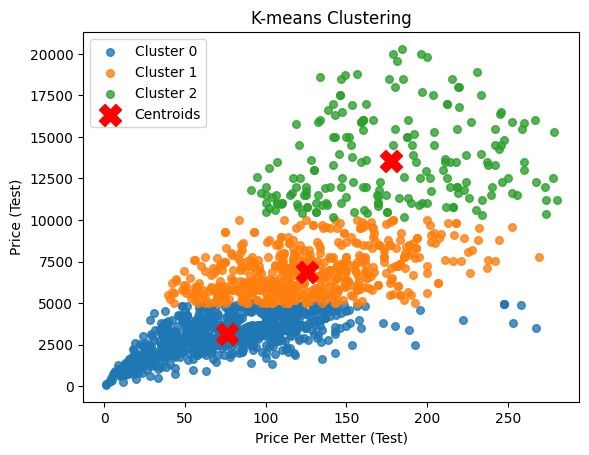

In [80]:
K = 3
interations = []
centers, labels, iterations = kmeans(test_df[['price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Price Per Metter (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['price_per_metter', 'price']].values, labels[-1])

Dựa vào biểu đồ, ta thấy rằng cụm 0 bị phân tán giá trị ra khá nhiều. Dù vậy thì 3 cụm này vẫn rải đều các giá trị là vẫn khá ổn.

. Với area, price_per_metter:

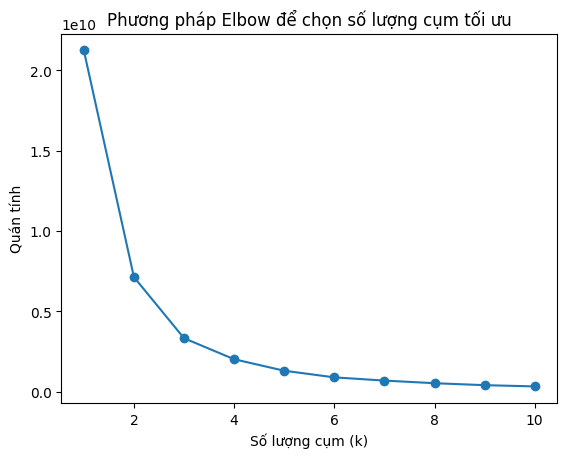

In [81]:
interation = elbow_k(test_df[['area', 'price_per_metter', 'price']].values, max_itr)

Centers được tìm thấy sau 7 lần lặp:
[[   50.02222884    77.17350894  3180.82850536]
 [   81.40105263   177.9498     13559.09147158]
 [   61.10847458   126.56978908  6962.97376648]]


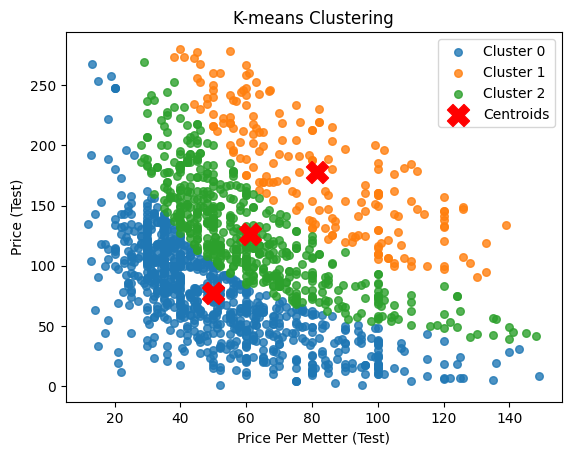

In [82]:
K = 3
interations = []
centers, labels, iterations = kmeans(test_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Price Per Metter (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['area', 'price_per_metter', 'price']].values, labels[-1])

Centers được tìm thấy sau 41 lần lặp:
[[   57.99454225   116.16720423  6015.60755563]
 [   68.17326733   162.15148515 10161.30623465]
 [   50.07848921    70.77744748  2851.11185612]
 [   88.07368421   187.78627368 15697.99868   ]]


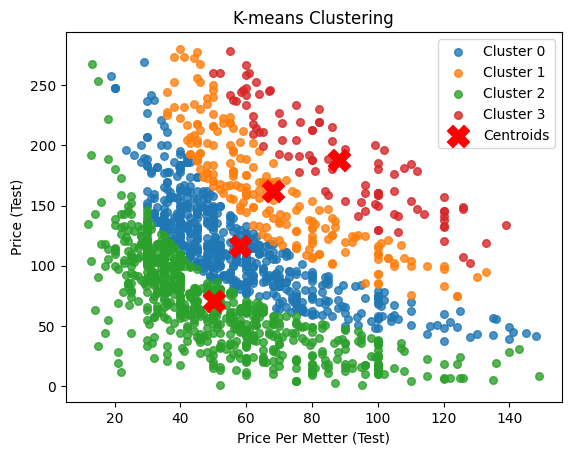

In [83]:
K = 4
interations = []
centers, labels, iterations = kmeans(test_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Price Per Metter (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['area', 'price_per_metter', 'price']].values, labels[-1])

Nhìn vào biểu đồ có thể thấy rằng các cụm vẫn phân bố giá trị ra khá đều tuy vẫn những giá trị bị thưa thưa ra ngoài nhưng nhìn chung lại thì kết quả phân nhóm vẫn là khá tốt khi tập kiểm thử có lượng dữ liệu nhỏ.

#### Kết luận: Sau khi thử cả tập train và tập test, em có nhận xét rằng cả 2 tập đều có lượng dữ liệu được phân nhóm tốt với giá nhà (price) -> mục tiêu và cũng như mô hình này đang được huấn luyện khá ổn định khi tính toán và tìm ra được các giá trị trung tâm của cụm hiệu quả.

### Về dự đoán giá nhà bằng cách sử dụng thuật toán Desicion Tree (ID3):
- Chia tập dữ liệu train, test:

In [122]:
data_encoded_refernce = data_encoded_refernce.sample(frac=1, random_state=42).reset_index(drop=True)

train_percentage = 0.8
num_train_samples = int(len(data_encoded_refernce) * train_percentage)

train_data = data_encoded_refernce.iloc[:num_train_samples, :]
test_data = data_encoded_refernce.iloc[num_train_samples:, :]

X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

- Tiến hành định nghĩa các hàm xây dựng cây quyết định (ID3) và hiển thị giá nhà đã dự đoán:

In [136]:
class Node:
    def __init__(self, value=None, attribute=None, threshold=None, left=None, right=None):
        self.value = value
        self.attribute = attribute
        self.threshold = threshold
        self.left = left
        self.right = right

def calculate_entropy(y):
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(X, y, attribute, threshold):
    mask = X[attribute] <= threshold
    y_left = y[mask]
    y_right = y[~mask]

    entropy_parent = calculate_entropy(y)
    entropy_left = calculate_entropy(y_left)
    entropy_right = calculate_entropy(y_right)

    num_left = len(y_left)
    num_right = len(y_right)
    num_total = len(y)

    information_gain = entropy_parent - (
        (num_left / num_total) * entropy_left + (num_right / num_total) * entropy_right
    )

    return information_gain

def find_best_split(X, y):
    best_information_gain = -1
    best_attribute = None
    best_threshold = None

    for attribute in X.columns:
        thresholds = np.unique(X[attribute])
        for threshold in thresholds:
            information_gain = calculate_information_gain(X, y, attribute, threshold)

            if information_gain > best_information_gain:
                best_information_gain = information_gain
                best_attribute = attribute
                best_threshold = threshold

    return best_attribute, best_threshold

def build_tree(X, y, max_depth=None, depth=0):
    if depth == max_depth or len(np.unique(y)) == 1:
        return Node(value=np.mean(y))

    best_attribute, best_threshold = find_best_split(X, y)

    if best_attribute is None:
        return Node(value=np.mean(y))

    mask = X[best_attribute] <= best_threshold
    X_left, y_left = X[mask], y[mask]
    X_right, y_right = X[~mask], y[~mask]

    left_child = build_tree(X_left, y_left, max_depth, depth + 1)
    right_child = build_tree(X_right, y_right, max_depth, depth + 1)

    return Node(attribute=best_attribute, threshold=best_threshold, left=left_child, right=right_child)

def predict_tree(node, x):
    if node.value is not None:
        return node.value

    if x[node.attribute] <= node.threshold:
        return predict_tree(node.left, x)
    else:
        return predict_tree(node.right, x)

max_depth = 10
tree_model = build_tree(X_train, y_train, max_depth=max_depth)

y_pred_tree = np.array([predict_tree(tree_model, x) for _, x in X_test.iterrows()])

In [137]:
print(f'Ta có {len(y_pred_tree)} giá trị về giá nhà sau khi dự đoán gồm những kết quả sau: \n', y_pred_tree)

Ta có 1561 giá trị về giá nhà sau khi dự đoán gồm những kết quả sau: 
 [4199.91       5259.958      3958.098      ... 4404.99775    5038.33333333
 5283.52      ]


Ta thấy rằng đây là những giá trị đã được mã hóa (scaled) của bộ dữ liệu và sau khi có kết quả dự đoán, ta tiến hành tới việc đánh giá hiệu suất của mô hình

- Đánh giá hiệu suất của mô hình dự đoán sau khi huấn luyện:

In [138]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = np.sum((y_true - y_pred) ** 2) / n
    return mse

# Sử dụng hàm để tính MSE
mse_custom = mean_squared_error(y_test, y_pred_tree)

print(f'Mean Squared Error: {mse_custom}')
print(f'Root Mean Squared Error: {np.sqrt(mse_custom)}')
print(f'Mean Absolute Error: {np.mean(np.abs(y_test - y_pred_tree))}')

Mean Squared Error: 122498.35678849761
Root Mean Squared Error: 349.9976525471244
Mean Absolute Error: 187.0302647027657


- Độ chính xác của mô hình:

In [139]:
def r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Sử dụng hàm để tính R^2
r2 = r_squared(y_test, y_pred_tree)

print(f'R^2 Score: {r2}')

R^2 Score: 0.9906934429189239


Ta thấy rằng điểm $R^{2}$ gần tiến về 1, điều này chứng tỏ rằng mô hình là khá tốt. Tuy nhiên đây chỉ là một phần vì $R^{2}$ không phản ánh được mọi khía cạnh của mô hình được.

- Vẽ biểu đồ thể hiện giá nhà thực tế và giá nhà dự đoán:

In [140]:
px.scatter(x=y_test, y=y_pred_tree, title='Biểu đồ thể hiện giá nhà thực tế và giá nhà dự đoán được', labels={'x': 'Giá nhà thực tế', 'y': 'Giá nhà dự đoán được'})

In [141]:
y_line = y_test.copy()

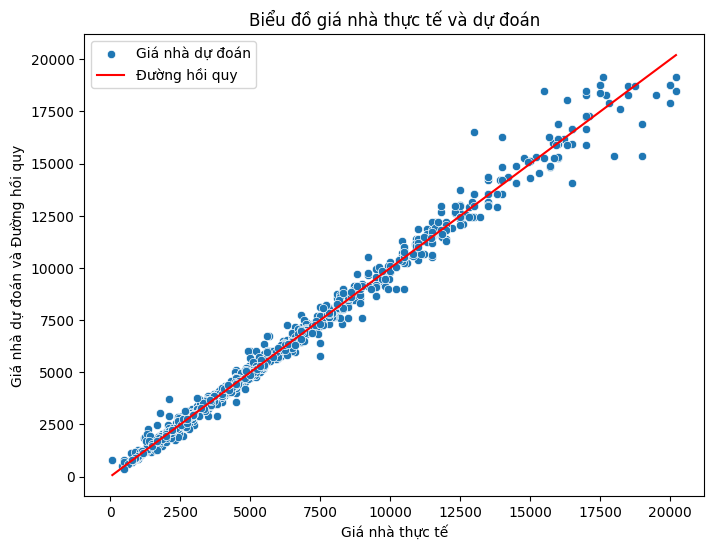

In [142]:
# Tạo DataFrame từ dữ liệu
df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_tree, 'Regression Line': y_line})
# Vẽ biểu đồ Scatterplot với đường hồi quy bằng seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=df, label='Giá nhà dự đoán')
sns.lineplot(x='Actual Price', y='Regression Line', data=df, color='red', label='Đường hồi quy')
plt.title('Biểu đồ giá nhà thực tế và dự đoán')
plt.xlabel('Giá nhà thực tế')
plt.ylabel('Giá nhà dự đoán và Đường hồi quy')
plt.legend()
plt.show()

Dựa vào biểu đồ scatter, ta thấy rằng giá nhà thực tế với giá nhà dự đoán có giá trị gần như là khá tốt với nhau, không có nhiều sự chênh lệch đáng kể giữa hai giá trị với nhau.

- Vẽ biểu đồ thể hiện sự chênh lệch giữa giá nhà thực tế và giá nhà dự đoán:

In [143]:
px.histogram(x=y_test - y_pred_tree, title='Biểu đồ thể hiện sự chênh lệch giữa giá nhà thực tế và giá nhà dự đoán được', labels={'x': 'Sự chênh lệch giữa giá nhà thực tế và giá nhà dự đoán được'})

Qua biểu đồ trên, ta thấy rằng ở mức độ ở khoảng từ -2000 đến 2000 có sự chênh lệch khá lớn giữa giá nhà thực tế với giá nhà dự đoán

#### Kết luận: Mô hình ID3 đã cho thấy khả năng dự đoán tốt trên dữ liệu giá nhà, và các độ đo lỗi thấp chỉ ra rằng nó có thể được tin tưởng để sử dụng trong dự đoán giá nhà trên tập kiểm thử. Tóm lại, việc sử dụng thuật toán ID3 trong dự đoán giá nhà đã đạt được kết quả khả quan, và mô hình có thể được cân nhắc sử dụng trong các ứng dụng thực tế.

### Thử lại với thư viện xài model có sẵn:

### Với Descion Tree (ID3):

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [145]:
X = data_encoded_refernce.drop('price', axis=1)
y = data_encoded_refernce['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6242, 133), (1561, 133), (6242,), (1561,))

In [147]:
tree_model1 = DecisionTreeRegressor(random_state=42)
tree_model1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [148]:
y_pred_tree1 = tree_model1.predict(X_test)
y_pred_tree1

array([ 2849.85, 10000.  , 11499.52, ...,  2589.9 ,  2349.9 ,  3950.1 ])

In [149]:
y_line1 = y_test

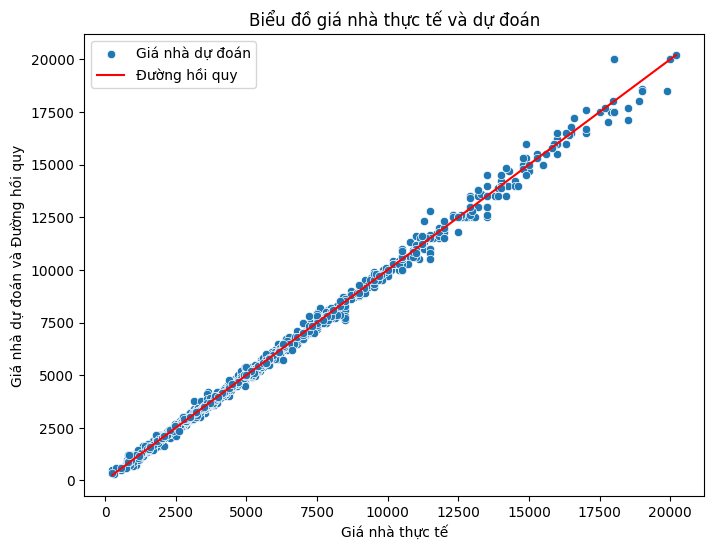

In [150]:
# Tạo DataFrame từ dữ liệu
df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_tree1, 'Regression Line': y_line1})
# Vẽ biểu đồ Scatterplot với đường hồi quy bằng seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=df, label='Giá nhà dự đoán')
sns.lineplot(x='Actual Price', y='Regression Line', data=df, color='red', label='Đường hồi quy')
plt.title('Biểu đồ giá nhà thực tế và dự đoán')
plt.xlabel('Giá nhà thực tế')
plt.ylabel('Giá nhà dự đoán và Đường hồi quy')
plt.legend()
plt.show()

In [151]:
px.scatter(x=y_test, y=y_pred_tree1, title='Biểu đồ thể hiện giá nhà thực tế và giá nhà dự đoán được', labels={'x': 'Giá nhà thực tế', 'y': 'Giá nhà dự đoán được'})

In [152]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_tree1)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_tree1))}')
print(f'Mean Absolute Error: {np.mean(np.abs(y_test - y_pred_tree1))}')

Mean Squared Error: 38907.11033088465
Root Mean Squared Error: 197.24885381386795
Mean Absolute Error: 100.52407168481746


In [153]:
print(f'R^2 Score: {r2_score(y_test, y_pred_tree1)}')

R^2 Score: 0.9970442002205386


In [154]:
print(f'Độ chính xác của mô hình là: {tree_model1.score(X_test, y_test)}')

Độ chính xác của mô hình là: 0.9970442002205386


### KMeans library:

In [156]:
d1 = data_encoded_refernce.copy()
data_cluster=data_encoded_refernce.copy()

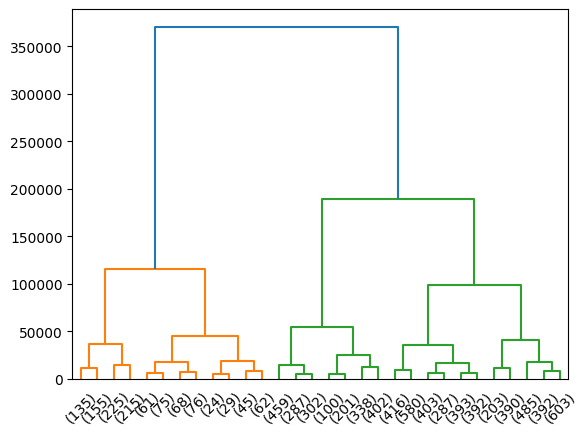

In [157]:
cls=d1[['area', 'price']]
mergings=linkage(cls,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [158]:
cluster=cut_tree(mergings, n_clusters=3)

In [159]:
cluster_cut = pd.Series(cut_tree(mergings,n_clusters=3).reshape(-1))

In [160]:
cluster_cut.value_counts()

1    4544
0    2089
2    1170
dtype: int64

In [163]:
d1['cluster']=cluster
d1.cluster

0       0
1       0
2       1
3       1
4       1
       ..
7798    0
7799    0
7800    1
7801    1
7802    1
Name: cluster, Length: 7803, dtype: int32

In [165]:
data_cluster['cluster']=cluster
data_cluster.cluster

0       0
1       0
2       1
3       1
4       1
       ..
7798    0
7799    0
7800    1
7801    1
7802    1
Name: cluster, Length: 7803, dtype: int32

<Axes: xlabel='area', ylabel='price'>

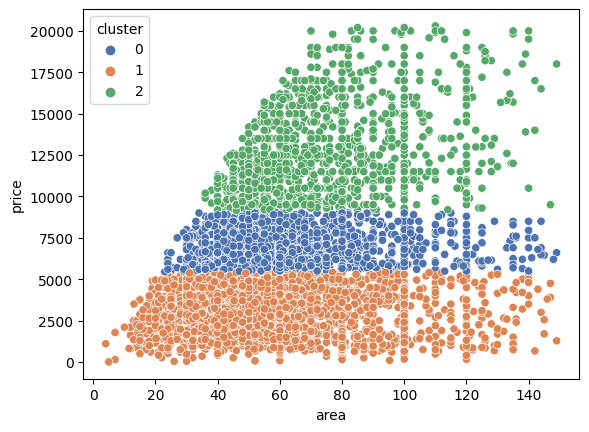

In [167]:
sns.scatterplot(y=data_encoded_refernce.price, x=data_encoded_refernce['area'] ,hue=data_cluster['cluster'], palette='deep')

In [168]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



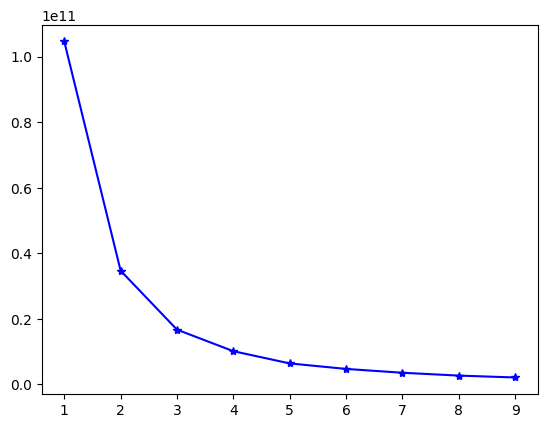

In [169]:
plt.plot(range(1,10),ssd,marker='*',color='b')

In [171]:
from sklearn.metrics import silhouette_score

score = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    labels = kmeans.labels_
    ss = silhouette_score(d1,labels)
    score.append(ss)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0.5, 0, 'no of clusters')

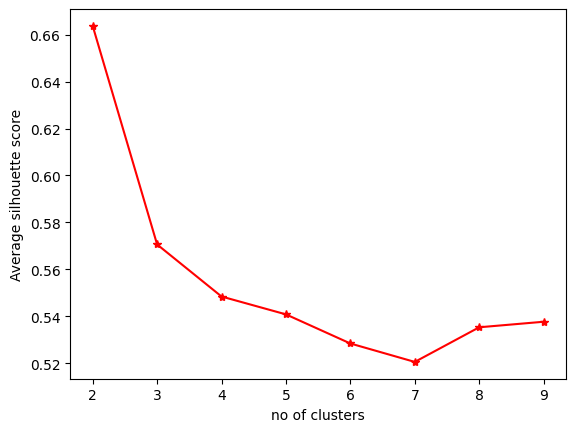

In [172]:
plt.plot(range(2,10),score,marker='*',color='r')
plt.ylabel('Average silhouette score')
plt.xlabel('no of clusters')

In [173]:
def svisualizer(x, ncluster):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    km = KMeans(n_clusters=ncluster, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(x)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0

    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()	

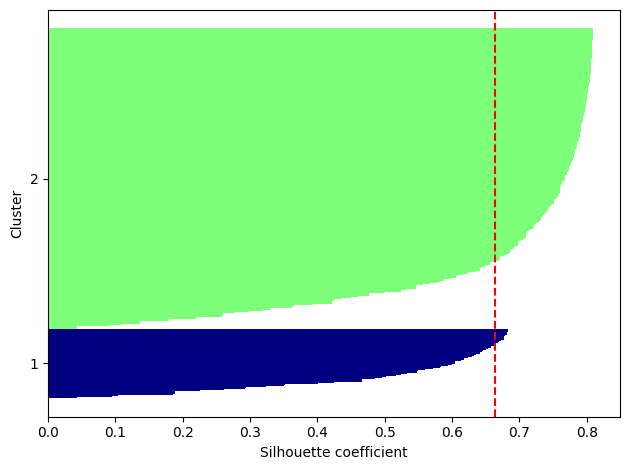

In [174]:
svisualizer(cls,2)

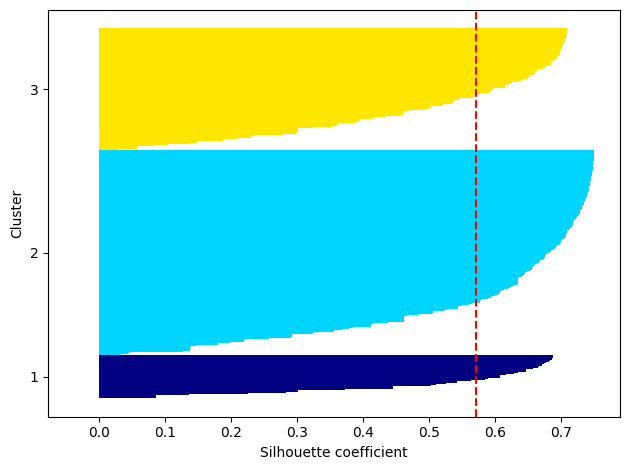

In [175]:
svisualizer(cls,3)

In [176]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_encoded_refernce)
data_cluster['kmeans_cluster']=cluster_kmeans
data_cluster.head()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



area  number_of_bathrooms  number_of_bedrooms  price_per_metter    price  \
0  53.0                  4.0                 3.0            128.30  6799.90   
1  80.0                  3.0                 4.0             83.75  6700.00   
2  50.0                  2.0                 2.0             16.00   800.00   
3  24.0                  3.0                 3.0            108.33  2599.92   
4  30.0                  4.0                 4.0            121.67  3650.10   

   location_An Dương, Hải Phòng  location_Ba Đình, Hà Nội  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   location_Biên Hòa, Đồng Nai  location_Buôn Ma Thuột, Đắk Lắk  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   location_Bà Rịa, Bà Rịa - Vũng Tàu  ...  location_Ý Yên, Nam Định  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   

   location_Điện Bàn, Quảng Nam  location_Đà Lạt, Lâm Đồng  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   location_Đông Anh, Hà Nội  location_Đống Đa, Hà Nội  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         1   
4                          0                         0   

   location_Đồng Xoài, Bình Phước  location_Đức Hòa, Long An  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   location_Đức Trọng, Lâm Đồng  cluster  kmeans_cluster  
0                             0        0               2  
1                             0        0               2  
2                             0        1               1  
3                             0        1               1  
4                             0        1               1  

[5 rows x 136 columns]

In [184]:
data_cluster.head()

area  number_of_bathrooms  number_of_bedrooms  price_per_metter    price  \
0  53.0                  4.0                 3.0            128.30  6799.90   
1  80.0                  3.0                 4.0             83.75  6700.00   
2  50.0                  2.0                 2.0             16.00   800.00   
3  24.0                  3.0                 3.0            108.33  2599.92   
4  30.0                  4.0                 4.0            121.67  3650.10   

   location_An Dương, Hải Phòng  location_Ba Đình, Hà Nội  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   location_Biên Hòa, Đồng Nai  location_Buôn Ma Thuột, Đắk Lắk  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   location_Bà Rịa, Bà Rịa - Vũng Tàu  ...  location_Ý Yên, Nam Định  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   

   location_Điện Bàn, Quảng Nam  location_Đà Lạt, Lâm Đồng  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   location_Đông Anh, Hà Nội  location_Đống Đa, Hà Nội  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         1   
4                          0                         0   

   location_Đồng Xoài, Bình Phước  location_Đức Hòa, Long An  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   location_Đức Trọng, Lâm Đồng  cluster  kmeans_cluster  
0                             0        0               2  
1                             0        0               2  
2                             0        1               1  
3                             0        1               1  
4                             0        1               1  

[5 rows x 136 columns]

In [185]:
df3 = data_cluster.iloc[:,[0,1,2,3,4,135]]

In [186]:
df4 = df3.groupby(by='kmeans_cluster')
df4[['area','number_of_bedrooms','number_of_bathrooms','price_per_metter','price']].mean()

area  number_of_bedrooms  number_of_bathrooms  \
kmeans_cluster                                                       
0               77.934561            4.060022             3.679740   
1               50.463772            2.967760             2.806607   
2               60.409387            3.753446             3.527489   

                price_per_metter         price  
kmeans_cluster                                  
0                     185.685651  13582.819647  
1                      76.701542   3214.470997  
2                     126.900878   6962.694715

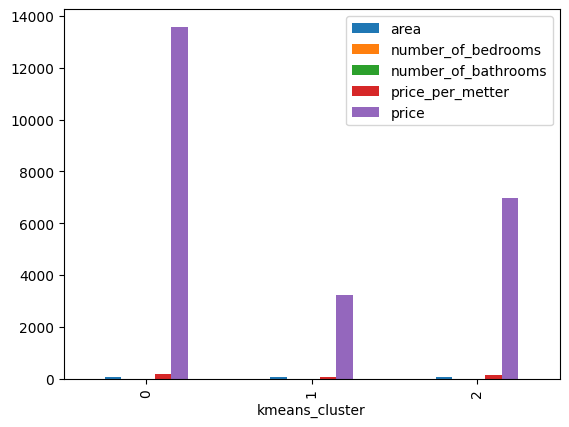

In [187]:
df4[['area','number_of_bedrooms','number_of_bathrooms','price_per_metter','price']].mean().plot.bar()
plt.show()

In [188]:
def cluster_plot(data, nclusters):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    X = data.copy()
    cols = list(X.columns)
    km = KMeans(n_clusters=nclusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)


    # Visualize it:
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

    # plot the centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

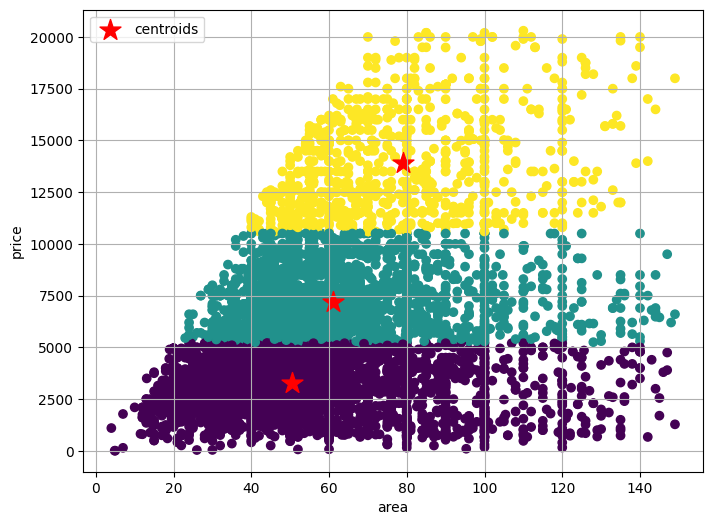

In [189]:
cluster_plot(cls,3)